 # Strategic Portfolio Optimization and Forecasting: "An Analysis Across Diverse Sectors"


#### Class project for DATA 690 Financial Data Science,
#### by  Team 8.  
#### Venkata Sai Sumanth Aketi , Allepu Sai Sreeja ,  Mounika Poreddi

## Project Overview

The primary objective of this project is to examine and forecast the performance of a select set of companies from various industries, with an emphasis on maximizing the investment portfolio through strategic allocation. The initiative aims to educate investment decisions by incorporating approaches to balance the risk-return trade-off, such as advanced financial analysis and time series modeling.

The portfolio includes companies from the following industries: technology, healthcare, consumer goods, energy, e-commerce/technology, financial services, and internet. Apple Inc., Johnson & Johnson, The Coca-Cola Company, Exxon Mobil Corporation, Amazon.com Inc., Visa Inc., Procter & Gamble Company, and Alphabet Inc. are among the corporations under consideration, representing a diverse range of market dynamics and investment prospects.

**The project covers the following key aspects:**

1. Obtaining Historical Stock Data: Collecting historical stock price data for the chosen companies to serve as the foundation for all subsequent analysis.

2. Data Preparation and Visualization: The stock data is prepared and cleaned before being comprehensively visualized to comprehend previous performance trends.

3. Statistical Analysis: Using time series decomposition, stationarity tests (Augmented Dickey-Fuller test), and autocorrelation analysis to investigate the stock data's properties.

**Portfolio Analysis:**

1. To evaluate diversification benefits, calculate expected returns using the Capital Asset Pricing Model (CAPM) and analyze stock correlations.
2. Implementing a variety of portfolio allocation strategies, such as equal-weighted allocation and expected return optimization, to demonstrate diverse approaches to risk minimization and return maximization.
3. Using a combination of theoretical and applied financial modeling tools, we will investigate the implications of portfolio adjustments on overall performance.

**Modeling**: Using the Auto Regressive Model, Moving Average model and ARIMA model on stock data to forecast future stock price movements based on historical trends.

**Visualizing Financial Data**: Creating plots and graphs to visually show stock performance, the effects of various allocation techniques, and the predicted outcomes of the time series model.


This detailed analysis seeks to provide actionable insights into optimal portfolio creation and management by utilizing statistical modeling and financial theory to navigate the complexity of the stock market. The research captures the essence of financial analysis and portfolio theory by taking a systematic approach to investment plan design.





## Dataset

We have imported the stock prices of the below mentioned stocks and an index, S&P500 (^GSPC) from Yahoo finance using `yfinance` library.

a. Apple Inc. (AAPL) - Technology  
b. Johnson & Johnson (JNJ) - Healthcare  
c. The Coca-Cola Company (KO) - Consumer Goods  
d. Exxon Mobil Corporation (XOM) - Energy  
e. Amazon.com Inc. (AMZN) - E-commerce/Technology  
f. Visa Inc. (V) - Financial Services  
g. Procter & Gamble Company (PG) - Consumer Goods  
h. Alphabet Inc. (GOOGL) - Technology/Internet


In [1]:
# importing the libraries
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings

In [2]:
# List of selected stock symbols
stocks = ['AAPL', 'JNJ', 'KO', 'XOM', 'AMZN', 'V', 'PG', 'GOOGL','^GSPC']

# Fetch historical stock price data
stock_data = yf.download(stocks, start='2018-01-01', end='2023-12-31', interval= '1d')['Close']

stock_data.head(5)

[*********************100%%**********************]  9 of 9 completed


Ticker           AAPL       AMZN      GOOGL         JNJ         KO         PG  \
Date                                                                            
2018-01-02  43.064999  59.450500  53.660500  139.229996  45.540001  90.650002   
2018-01-03  43.057499  60.209999  54.576000  140.559998  45.439999  90.540001   
2018-01-04  43.257500  60.479500  54.787998  140.550003  46.080002  91.180000   
2018-01-05  43.750000  61.457001  55.514500  141.710007  46.070000  91.239998   
2018-01-08  43.587502  62.343498  55.710499  141.889999  46.000000  91.720001   

Ticker               V        XOM        ^GSPC  
Date                                            
2018-01-02  114.510002  85.029999  2695.810059  
2018-01-03  115.650002  86.699997  2713.060059  
2018-01-04  116.080002  86.820000  2723.989990  
2018-01-05  118.860001  86.750000  2743.149902  
2018-01-08  119.339996  87.139999  2747.709961

In [3]:
# Renaming the columns and also updating the stocks list for further use
stocks = ['AAPL', 'JNJ', 'KO', 'XOM', 'AMZN', 'V', 'PG', 'GOOGL','GSPC']
stock_data.columns = stocks
stock_data.head(5)

AAPL        JNJ         KO         XOM       AMZN          V  \
Date                                                                            
2018-01-02  43.064999  59.450500  53.660500  139.229996  45.540001  90.650002   
2018-01-03  43.057499  60.209999  54.576000  140.559998  45.439999  90.540001   
2018-01-04  43.257500  60.479500  54.787998  140.550003  46.080002  91.180000   
2018-01-05  43.750000  61.457001  55.514500  141.710007  46.070000  91.239998   
2018-01-08  43.587502  62.343498  55.710499  141.889999  46.000000  91.720001   

                    PG      GOOGL         GSPC  
Date                                            
2018-01-02  114.510002  85.029999  2695.810059  
2018-01-03  115.650002  86.699997  2713.060059  
2018-01-04  116.080002  86.820000  2723.989990  
2018-01-05  118.860001  86.750000  2743.149902  
2018-01-08  119.339996  87.139999  2747.709961

In [4]:
# Checking the number of null values in each column
stock_data.isnull().sum()

AAPL     0
JNJ      0
KO       0
XOM      0
AMZN     0
V        0
PG       0
GOOGL    0
GSPC     0
dtype: int64

### Visualizations of all stocks

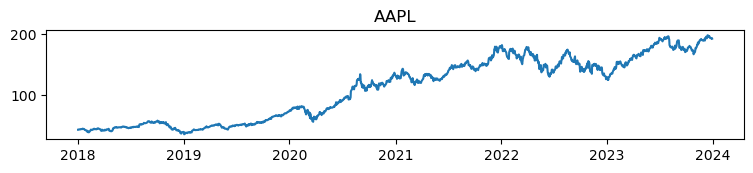

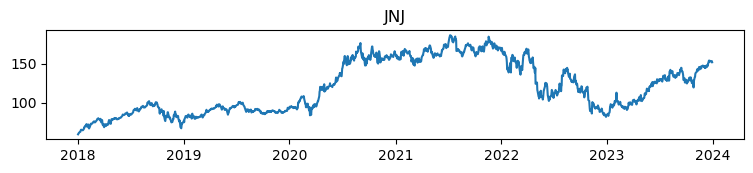

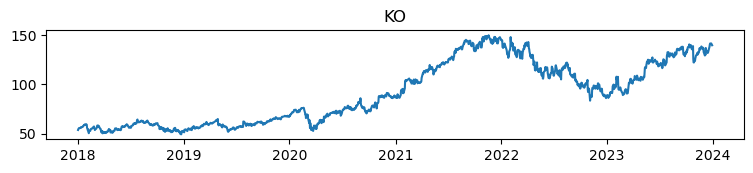

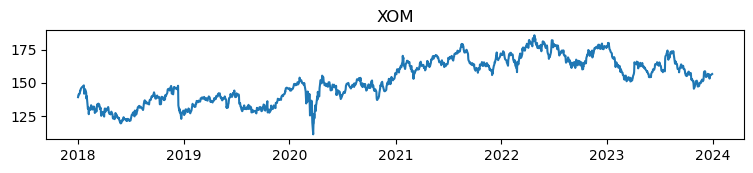

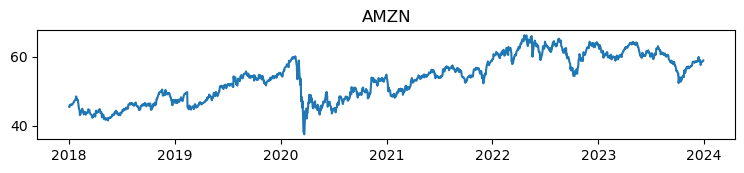

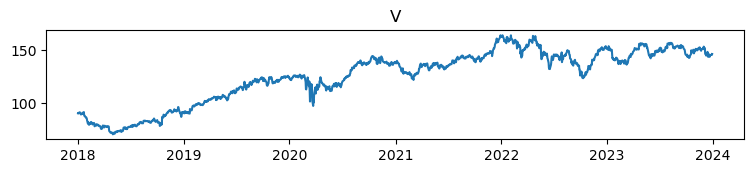

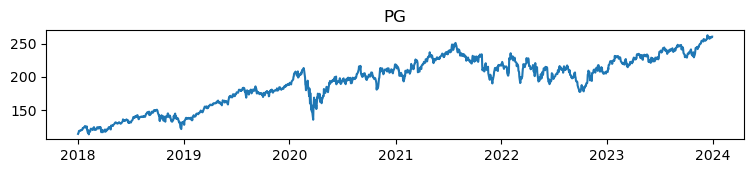

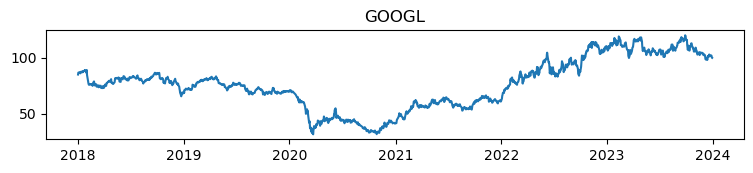

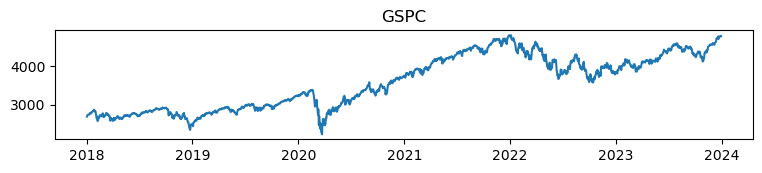

In [5]:
for i, stock in enumerate(stock_data.columns, start=1):
    plt.figure(figsize=(9, 15))
    plt.subplot(9, 1, i)
    plt.plot(stock_data[stock])
    plt.title(f'{stock}')
    plt.show()

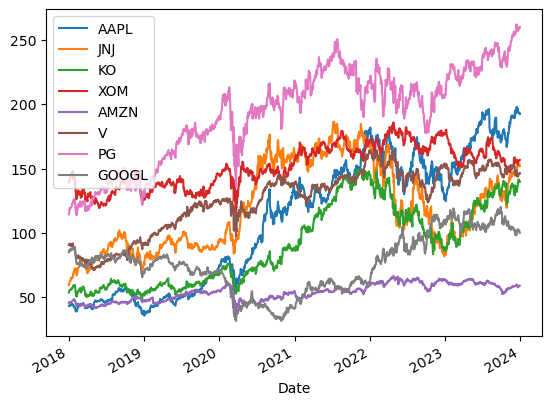

In [6]:
#plotting all the stocks together excluding index
stock_data.iloc[:,:-1].plot();


As per the plots we could see that there is more downfall due to Covid pandemic. So we are not considering that unusual situation and filtering the data from 2021-01-01 to 2023-12-31

In [7]:
# Filter the stock data
stock_data_filtered = stock_data.loc['2021-01-01':'2023-12-31']
stock_data_filtered.head(5)

AAPL         JNJ         KO         XOM       AMZN  \
Date                                                                   
2021-01-04  129.410004  159.331497  86.306503  156.500000  52.759998   
2021-01-05  131.009995  160.925507  87.002502  158.339996  52.180000   
2021-01-06  126.599998  156.919006  86.143997  159.830002  50.520000   
2021-01-07  130.919998  158.108002  88.717003  160.369995  49.959999   
2021-01-08  132.050003  159.134995  89.891502  160.039993  51.080002   

                     V          PG      GOOGL         GSPC  
Date                                                        
2021-01-04  137.820007  217.759995  41.500000  3700.649902  
2021-01-05  138.699997  214.509995  43.500000  3726.860107  
2021-01-06  140.160004  212.619995  44.610001  3748.139893  
2021-01-07  138.850006  213.809998  44.959999  3803.790039  
2021-01-08  138.789993  215.449997  45.459999  3824.679932

In [8]:
stock_data_filtered.tail(5)

AAPL         JNJ          KO         XOM       AMZN  \
Date                                                                    
2023-12-22  193.600006  153.419998  141.490005  155.460007  58.320000   
2023-12-26  193.050003  153.410004  141.520004  156.139999  58.560001   
2023-12-27  193.149994  153.339996  140.369995  156.350006  58.709999   
2023-12-28  193.580002  153.380005  140.229996  156.580002  58.750000   
2023-12-29  192.529999  151.940002  139.690002  156.740005  58.930000   

                     V          PG       GOOGL         GSPC  
Date                                                         
2023-12-22  145.279999  258.429993  101.910004  4754.629883  
2023-12-26  145.940002  259.160004  102.139999  4774.750000  
2023-12-27  146.059998  258.929993  101.660004  4781.580078  
2023-12-28  145.729996  260.399994  100.190002  4783.350098  
2023-12-29  146.539993  260.350006   99.980003  4769.830078

### Decomposition of the data

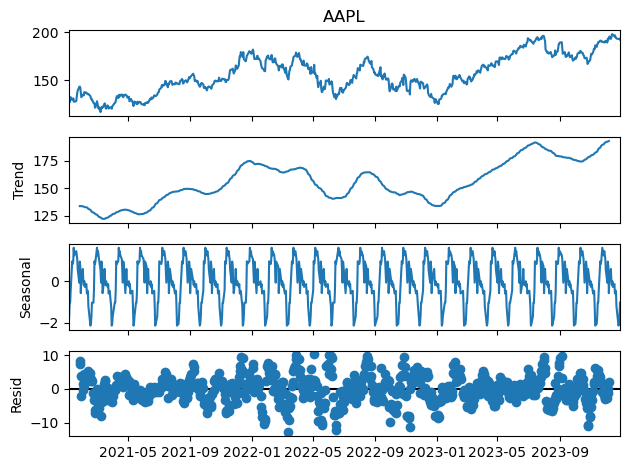

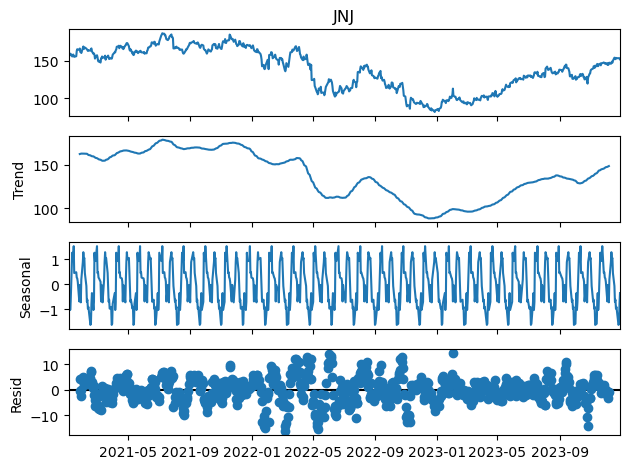

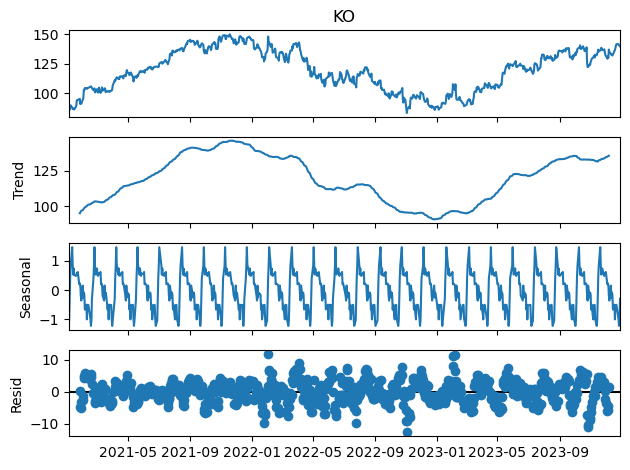

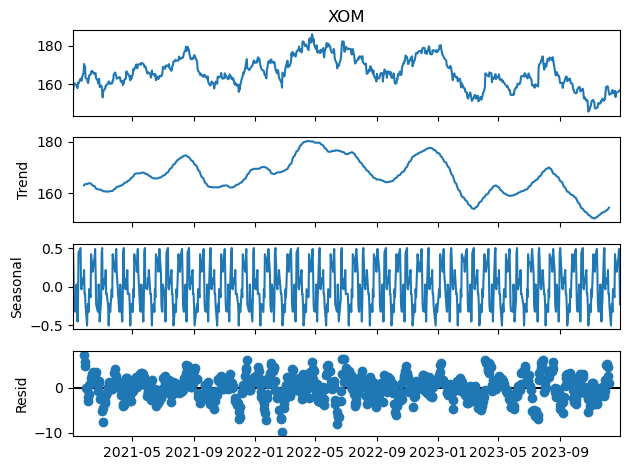

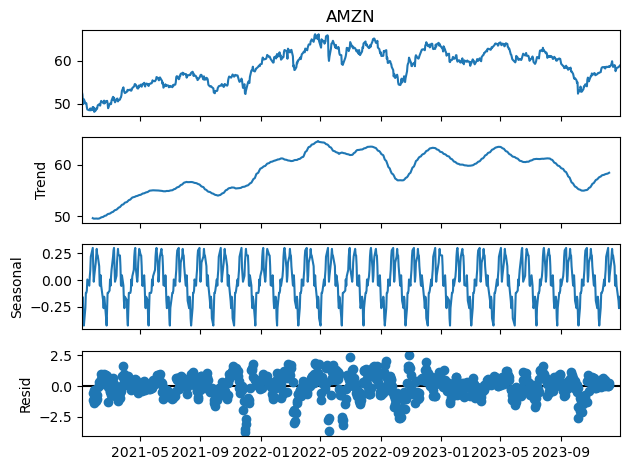

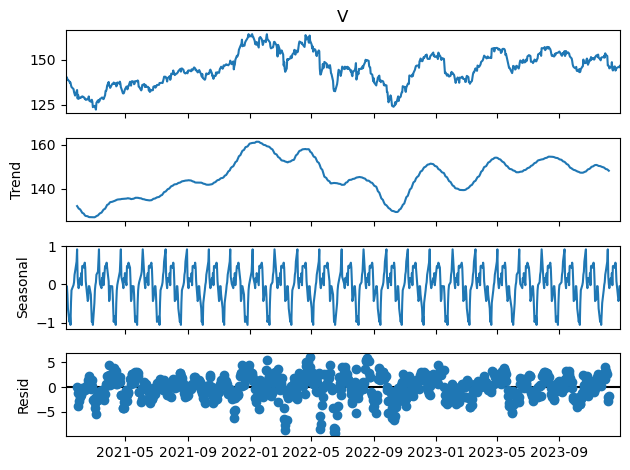

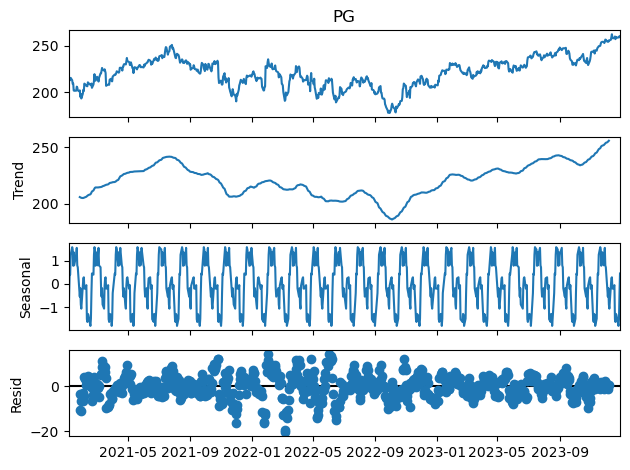

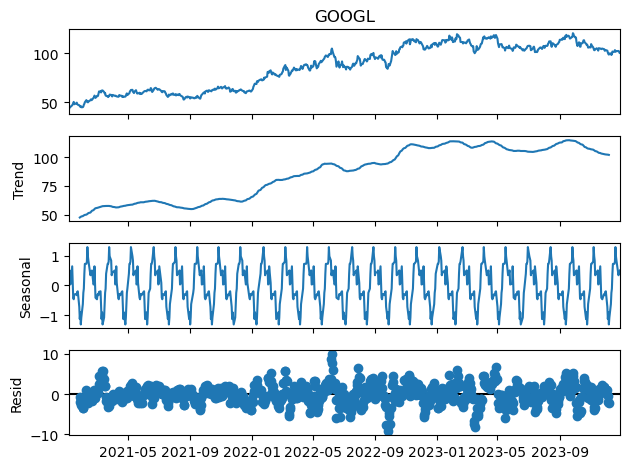

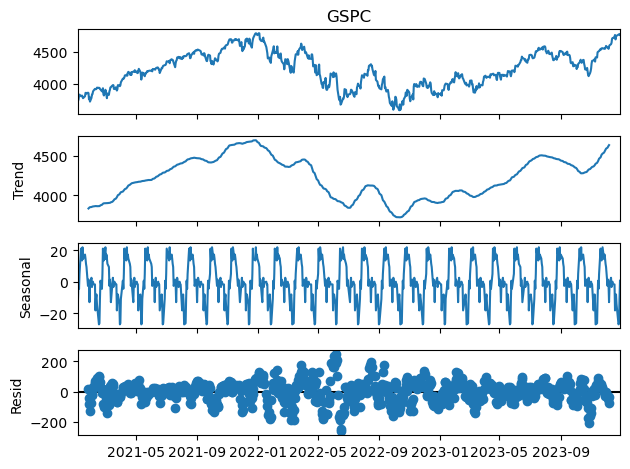

In [9]:
for symbol in stocks:
    decomposition = sm.tsa.seasonal_decompose(stock_data_filtered[symbol], model='additive', period=30)
    decomposition.plot()

From the above decomposition plots we could say that AAPL, KO, AMZN, V, PG, GOOGL have upward trend while JNJ, XOM stocks have downward trend for the mentioned dates. There is seasonality in all the stocks including the GSPC index. There is high voltility in the residuals, which indicates that the stocks are not stationary


### Calculate expected returns using CAPM

In [10]:
risk_free_rate = 0
market_return = 0.08  # Assumed market return
expected_returns_capm = {}
for symbol in stocks:
    beta = stock_data_filtered[symbol].pct_change().cov(stock_data_filtered['GSPC'].pct_change()) / stock_data_filtered['GSPC'].pct_change().var()
    expected_return = beta * market_return
    expected_returns_capm[symbol] = expected_return


### Calculate risk metrics

In [11]:
# Convert expected returns to NumPy array
expected_returns_array = np.array(list(expected_returns_capm.values()))

std_devs = stock_data_filtered.pct_change().std() * np.sqrt(252)  # Annualized standard deviation
sharpe_ratios = (expected_returns_array - risk_free_rate) / std_devs

In [12]:
warnings.filterwarnings('ignore')
# Display risk metrics
print("Risk Analysis:")
for i, symbol in enumerate(stocks):
    print(f"{symbol}:")
    print(f"  Standard Deviation: {std_devs[i]:.4f}")
    print(f"  Sharpe Ratio: {sharpe_ratios[i]:.4f}")

Risk Analysis:
AAPL:
  Standard Deviation: 0.2780
  Sharpe Ratio: 0.3663
JNJ:
  Standard Deviation: 0.3740
  Sharpe Ratio: 0.3236
KO:
  Standard Deviation: 0.3174
  Sharpe Ratio: 0.3390
XOM:
  Standard Deviation: 0.1619
  Sharpe Ratio: 0.1608
AMZN:
  Standard Deviation: 0.1624
  Sharpe Ratio: 0.2315
V:
  Standard Deviation: 0.1752
  Sharpe Ratio: 0.2012
PG:
  Standard Deviation: 0.2439
  Sharpe Ratio: 0.3125
GOOGL:
  Standard Deviation: 0.3034
  Sharpe Ratio: 0.1621
GSPC:
  Standard Deviation: 0.1759
  Sharpe Ratio: 0.4547



As per the above data we could see that risk is more in Johnson and johnson stock and sharpe ratio is positive for all the stocks and it is highest for Apple stock (excluding GPSC index). That means Apple stock is giving the highest returns over the risk.

# Calculate correlation matrix

In [13]:
correlation_matrix = stock_data_filtered.pct_change().corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
           AAPL       JNJ        KO       XOM      AMZN         V        PG  \
AAPL   1.000000  0.607377  0.664993  0.240156  0.372368  0.313604  0.547134   
JNJ    0.607377  1.000000  0.662605  0.120170  0.237642  0.163847  0.432458   
KO     0.664993  0.662605  1.000000  0.179097  0.275131  0.239956  0.458292   
XOM    0.240156  0.120170  0.179097  1.000000  0.464249  0.493787  0.256937   
AMZN   0.372368  0.237642  0.275131  0.464249  1.000000  0.668168  0.417937   
V      0.313604  0.163847  0.239956  0.493787  0.668168  1.000000  0.347028   
PG     0.547134  0.432458  0.458292  0.256937  0.417937  0.347028  1.000000   
GOOGL  0.176289  0.123538  0.149720  0.112084  0.180783  0.059884  0.248266   
GSPC   0.805560  0.711780  0.745590  0.353648  0.509074  0.442389  0.687167   

          GOOGL      GSPC  
AAPL   0.176289  0.805560  
JNJ    0.123538  0.711780  
KO     0.149720  0.745590  
XOM    0.112084  0.353648  
AMZN   0.180783  0.509074  
V      0.059884  0.4

Correlation determines the strength and direction of the two random stocks.

<Axes: >

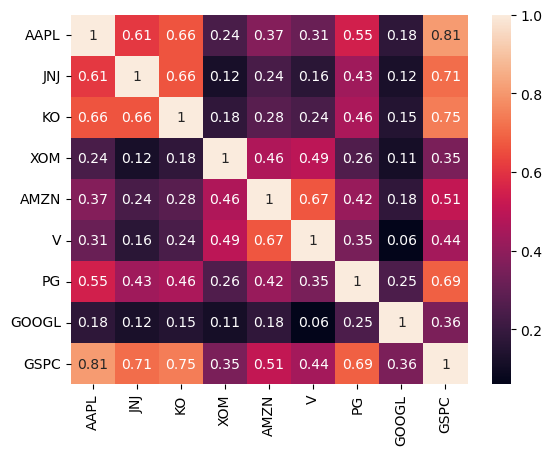

In [14]:
sns.heatmap(correlation_matrix, annot=True)

The correlation matrix reveals that Apple (AAPL) and Johnson & Johnson (JNJ) demonstrate strong positive correlations with the S&P 500 index (GSPC), indicating their movements often align with the broader market. Coca-Cola (KO) and Procter & Gamble (PG) also exhibit significant positive correlations with the index. However, Exxon Mobil (XOM) shows a comparatively weaker positive correlation. Amazon.com (AMZN) and Visa Inc. (V) display moderate positive correlations, while Alphabet Inc. (GOOGL) exhibits a relatively weak positive correlation with the S&P 500 index. These correlations can inform portfolio diversification and risk management strategies.

# Equal-weighted portfolio allocation

In [15]:
portfolio_weights_equal = {symbol: 1/(len(stocks)-1) for symbol in stocks if symbol != 'GSPC'}
print("\nEqual Portfolio Weights:")
for symbol, weight in portfolio_weights_equal.items():
    print(f"{symbol}: {weight:.4f}")



Equal Portfolio Weights:
AAPL: 0.1250
JNJ: 0.1250
KO: 0.1250
XOM: 0.1250
AMZN: 0.1250
V: 0.1250
PG: 0.1250
GOOGL: 0.1250


If we are doing equal allocation then each stock would get a 12.5% allocation of the portfolio. Let's check for the otimized allocation for better profits.

### Calculate total expected return and portfolio allocation based on expected returns.

In [53]:
total_expected_return = sum(expected_returns_capm[symbol] for symbol in stocks if symbol != 'GSPC')

# Portfolio allocation based on expected returns
portfolio_weights_rank = {symbol: expected_returns_capm[symbol] / total_expected_return for symbol in stocks if symbol != 'GSPC'}
print("\nPortfolio Weights:")
for symbol, weight in portfolio_weights_rank.items():
    print(f"{symbol}: {weight:.4f}")



Portfolio Weights:
AAPL: 0.1836
JNJ: 0.2182
KO: 0.1940
XOM: 0.0469
AMZN: 0.0678
V: 0.0635
PG: 0.1374
GOOGL: 0.0886


Allocating 21% to JNJ, 19% to KO, 18% to AAPL would give better returns than the equal allocation.

### Calculating the first difference of the stock prices.

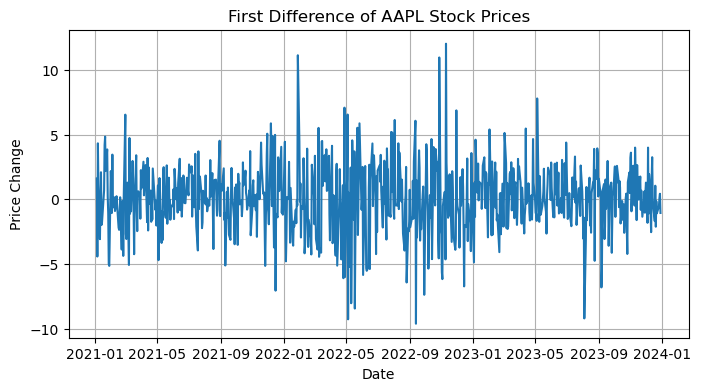

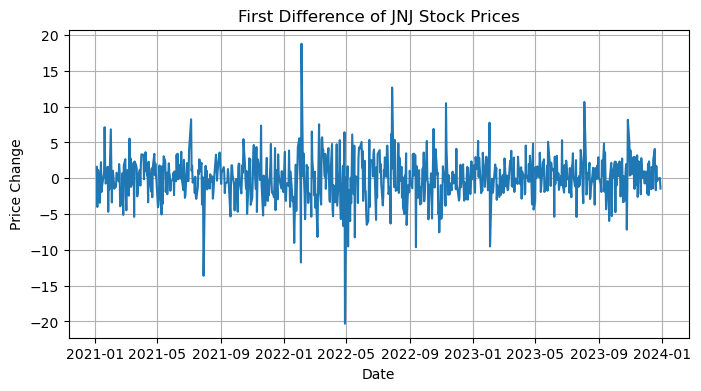

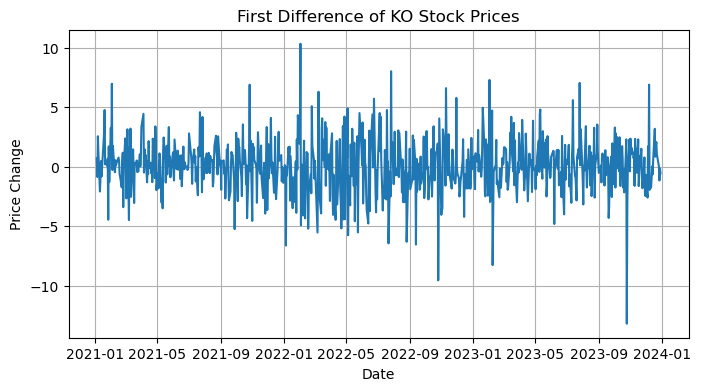

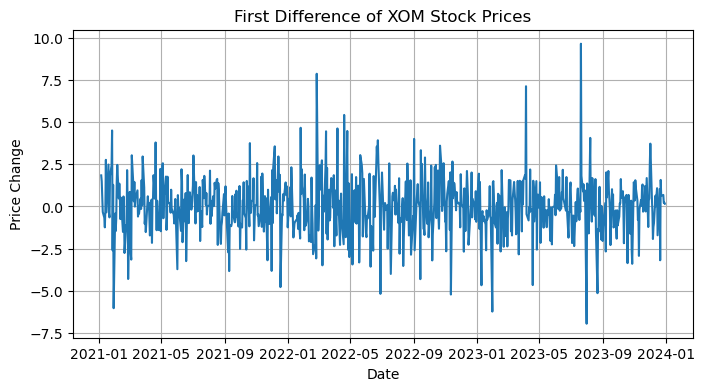

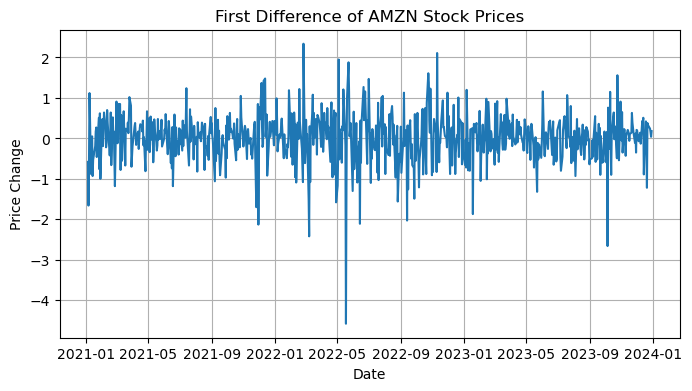

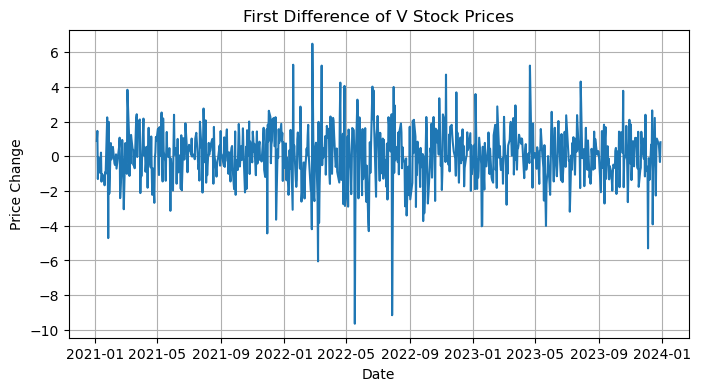

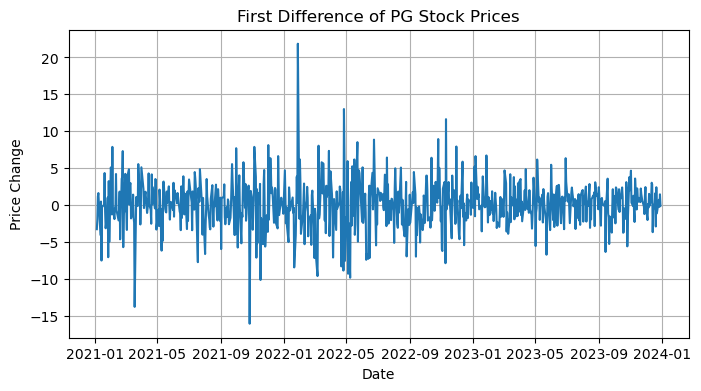

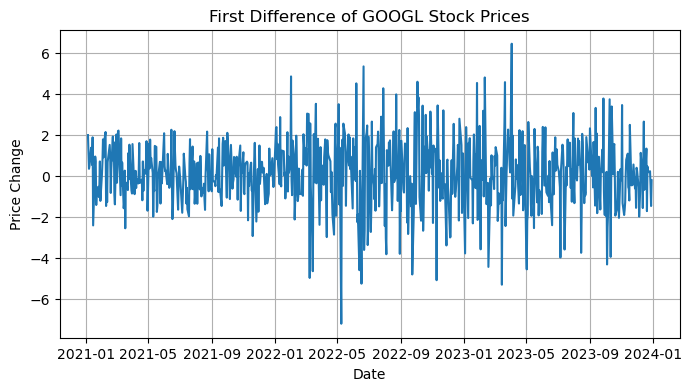

In [17]:
# Perform first difference on every stock (excluding the index)
first_diff_data = stock_data_filtered.diff()

stocks_only = ['AAPL', 'JNJ', 'KO', 'XOM', 'AMZN', 'V', 'PG', 'GOOGL']


# Plot the first difference for each stock separately
for stock in stocks_only:
    plt.figure(figsize=(8, 4))
    plt.plot(first_diff_data.index, first_diff_data[stock])
    plt.title(f'First Difference of {stock} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price Change')
    plt.grid(True)
    plt.show()


## Statistical Test for detecting stationarity: ADF (Augmented Dickey-Fuller )

In [18]:
for stock in stocks_only:
    stat_test = adfuller(stock_data_filtered[stock])
    print('The test statistic for {} is {:.4f} and p-value is {:.4f}'.format(stock,stat_test[0], stat_test[1]))

The test statistic for AAPL is -1.6252 and p-value is 0.4700
The test statistic for JNJ is -1.5907 and p-value is 0.4883
The test statistic for KO is -2.1378 and p-value is 0.2296
The test statistic for XOM is -2.9813 and p-value is 0.0367
The test statistic for AMZN is -2.2529 and p-value is 0.1876
The test statistic for V is -2.4987 and p-value is 0.1158
The test statistic for PG is -2.2224 and p-value is 0.1982
The test statistic for GOOGL is -1.8858 and p-value is 0.3388


As per the above statistics we could see that the p-value (confidence level) for all the is greater than 0.05, except for XOM stock. This means that the all the stocks are not stationary. So let's check on first differenced data.

In [19]:
for stock in stocks_only:
    stat_test = adfuller(first_diff_data[stock].dropna())
    print('The test statistic for {} is {:.4f} and p-value is {:.4f}'.format(stock,stat_test[0], stat_test[1]))

The test statistic for AAPL is -20.4411 and p-value is 0.0000
The test statistic for JNJ is -27.5478 and p-value is 0.0000
The test statistic for KO is -27.7196 and p-value is 0.0000
The test statistic for XOM is -28.0006 and p-value is 0.0000
The test statistic for AMZN is -27.3875 and p-value is 0.0000
The test statistic for V is -28.4997 and p-value is 0.0000
The test statistic for PG is -27.2332 and p-value is 0.0000
The test statistic for GOOGL is -20.4442 and p-value is 0.0000


As per the above we could see that the first differenced data is stationary with p<0.05. However we cannot just rely on the ADF. Let's go further to use ACF and PACF for checking the correlation.

### Autocorrelation Function (ACF)

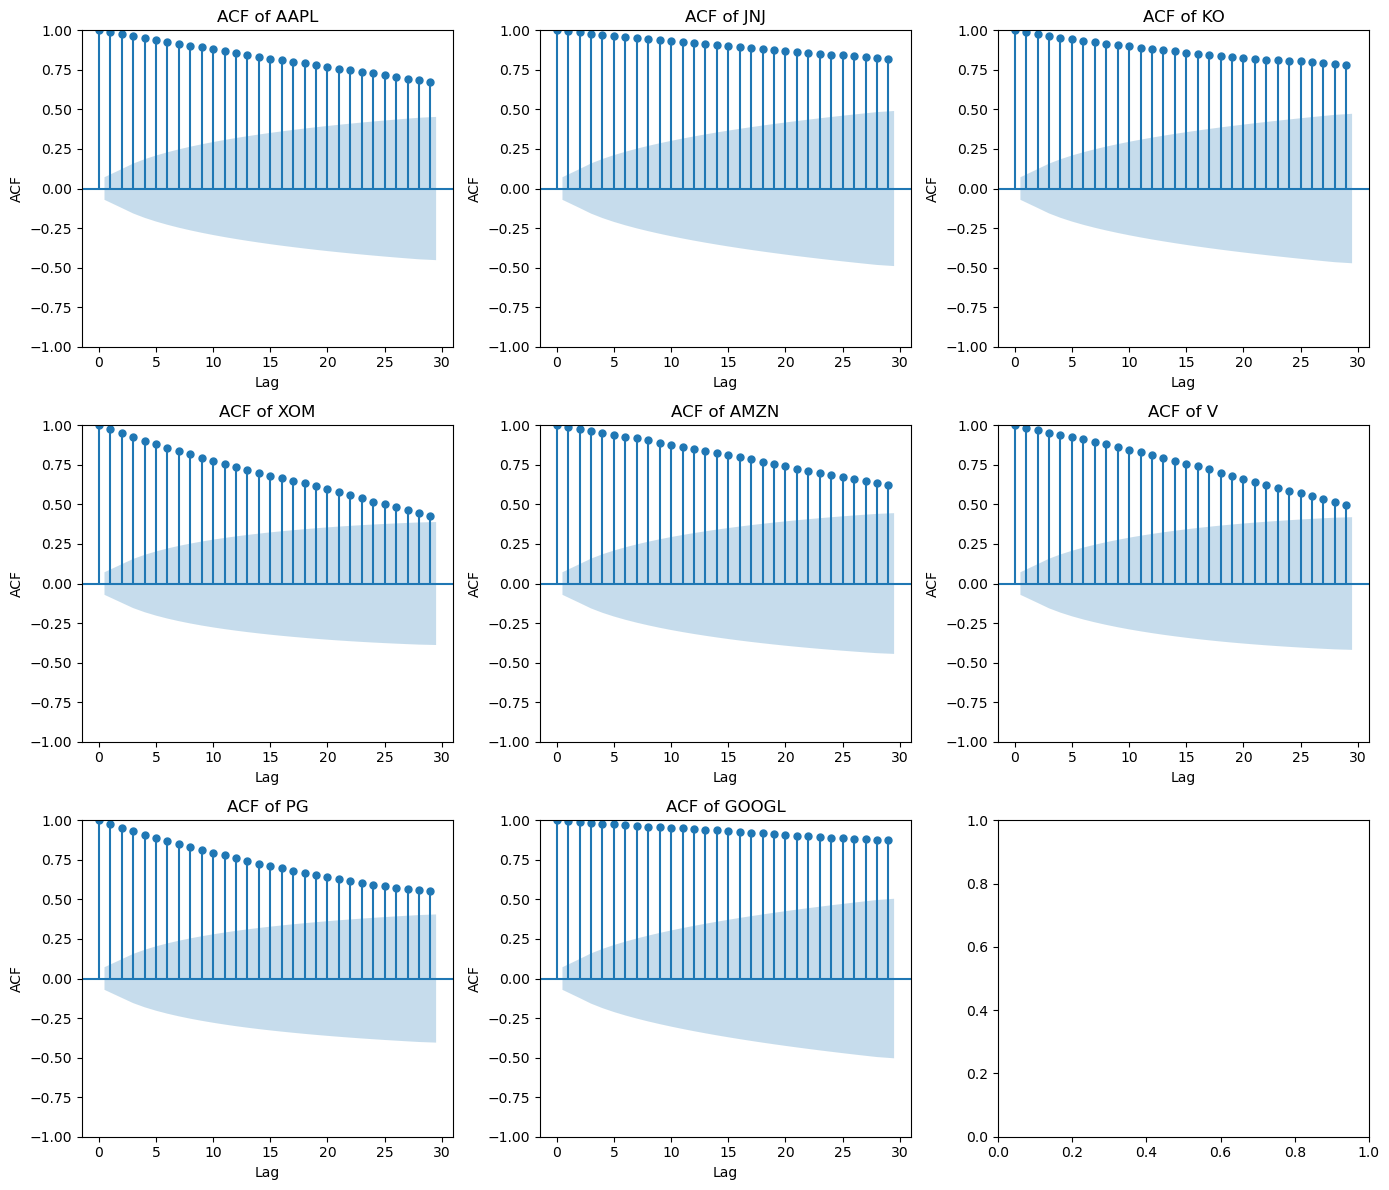

In [20]:
# Calculate and plot ACF of all stocks in a grid
#num_rows = (len(stocks) + 1) // 2  # Calculate number of rows for subplots
fig, axes = plt.subplots(3, 3, figsize=(14, 3 * 4))

for i, symbol in enumerate(stocks_only):
    row = i // 3
    col = i % 3
    sm.graphics.tsa.plot_acf(stock_data_filtered[symbol], ax=axes[row, col])
    axes[row, col].set_title(f'ACF of {symbol}')
    axes[row, col].set_xlabel('Lag')
    axes[row, col].set_ylabel('ACF')
    #axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

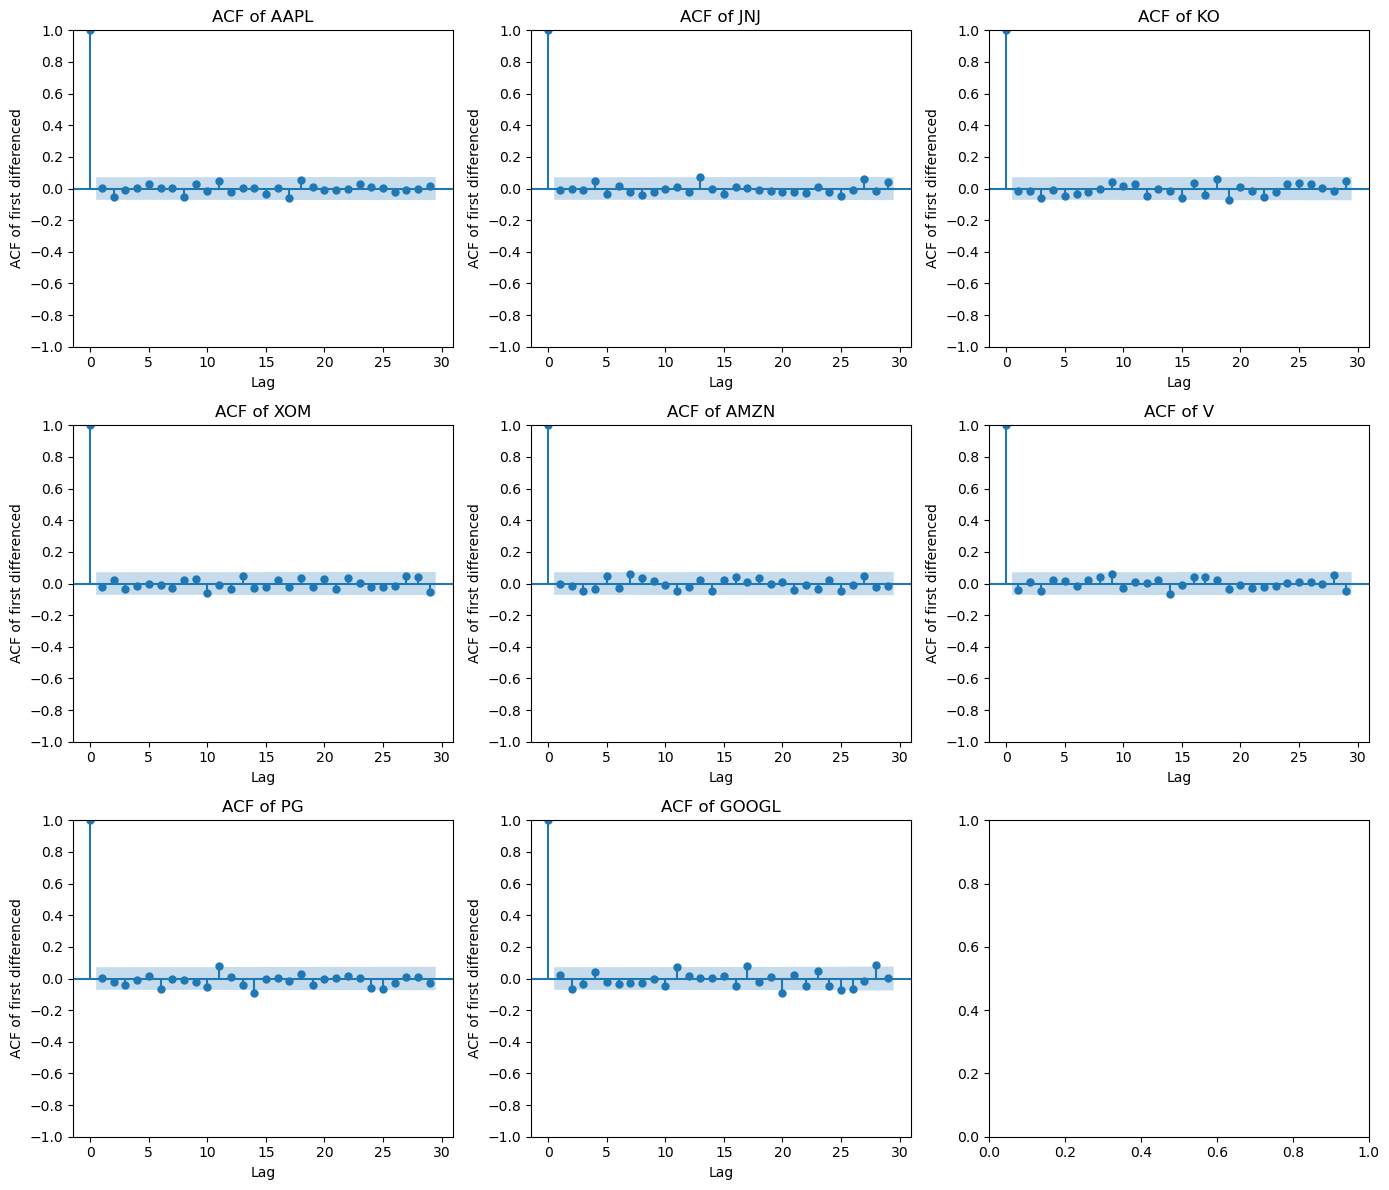

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(14, 3 * 4))

for i, symbol in enumerate(stocks_only):
    row = i // 3
    col = i % 3
    sm.graphics.tsa.plot_acf(first_diff_data[symbol].dropna(), ax=axes[row, col])
    axes[row, col].set_title(f'ACF of {symbol}')
    axes[row, col].set_xlabel('Lag')
    axes[row, col].set_ylabel('ACF of first differenced')
    axes[row, col].set_yticks(np.arange(-1, 1.1, 0.2))
    #axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

As per the above stocks we can find the spikes in ACF lags of various stocks as below and the best one (if there are more than one) which we are considering for the modelling.  
AAPL: 2,8,17,18 --> 17  
JNJ: 13  
KO: 3,15,18,19 --> 18   
XOM: 7  
AMZN: 7  
V: 9  
PG: 6,11,14 --> 11  
GOOGL: 2,11,17 --> 11

### Partial Autocorrelation Function (PACF)

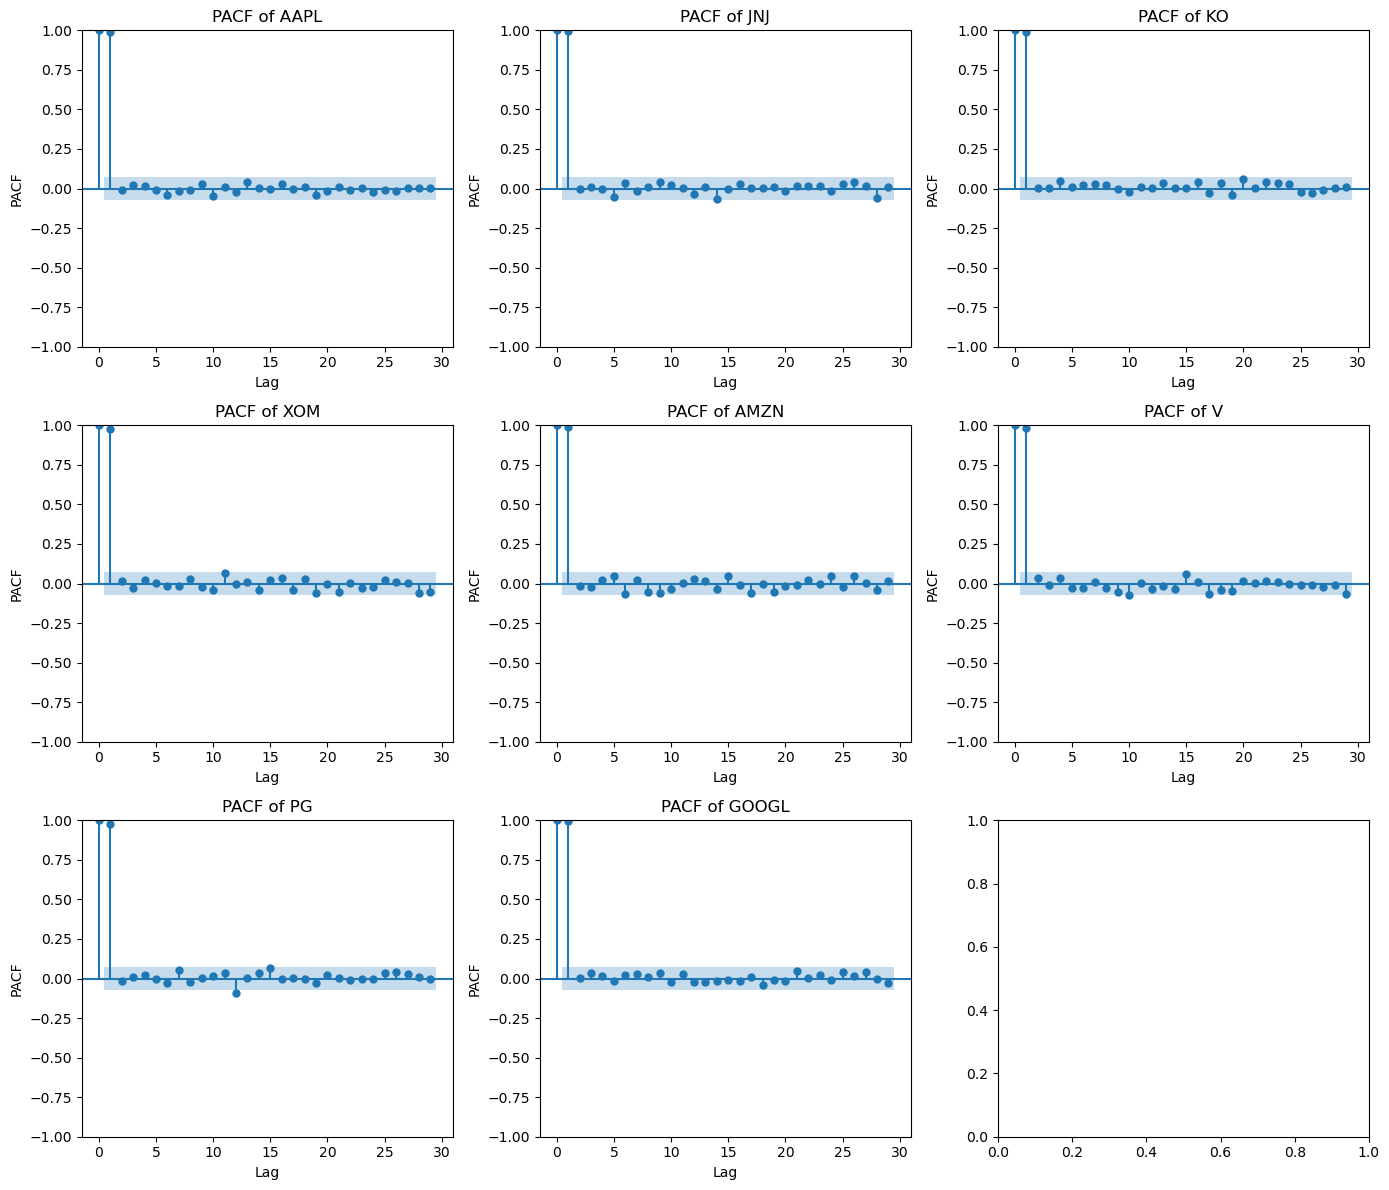

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(14, 3 * 4))

for i, symbol in enumerate(stocks_only):
    row = i // 3
    col = i % 3
    sm.graphics.tsa.plot_pacf(stock_data_filtered[symbol], ax=axes[row, col])
    axes[row, col].set_title(f'PACF of {symbol}')
    axes[row, col].set_xlabel('Lag')
    axes[row, col].set_ylabel('PACF')
    #axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

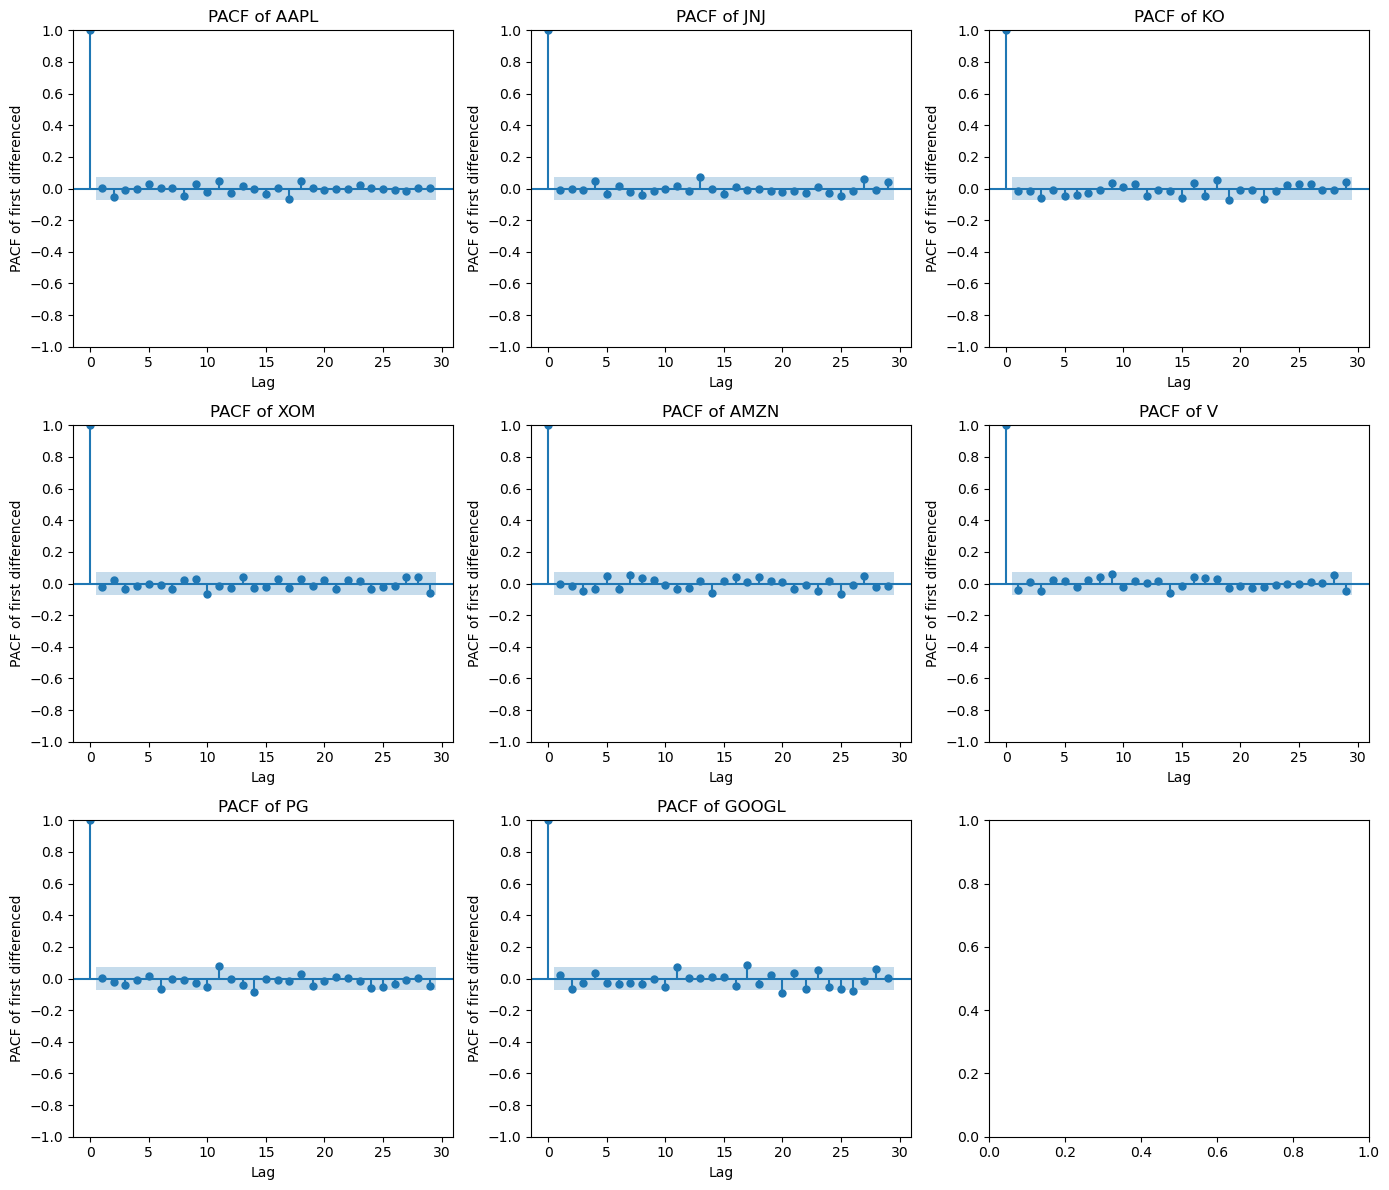

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(14, 3 * 4))

for i, symbol in enumerate(stocks_only):
    row = i // 3
    col = i % 3
    sm.graphics.tsa.plot_pacf(first_diff_data[symbol].dropna(), ax=axes[row, col])
    axes[row, col].set_title(f'PACF of {symbol}')
    axes[row, col].set_xlabel('Lag')
    axes[row, col].set_ylabel('PACF of first differenced')
    axes[row, col].set_yticks(np.arange(-1, 1.1, 0.2))
    #axes[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

As per the above stocks we can find the spikes in PACF lags of various stocks as below and the best one (if there are more than one) which I'm considering for the modelling.  
AAPL: 2,8,17,18 --> 17  
JNJ: 13
KO: 3,15,18,19 --> 19  
XOM: 10  
AMZN: 7,14 --> 14  
V: 9,14 --> 14  
PG: 6,11,14 --> 11  
GOOGL: 2,11,17 --> 11


Removing the null values in the differenced data

In [24]:
# Checking the number of null values in each column
first_diff_data.isnull().sum()

AAPL     1
JNJ      1
KO       1
XOM      1
AMZN     1
V        1
PG       1
GOOGL    1
GSPC     1
dtype: int64

In [25]:
first_diff_data = first_diff_data.dropna()

### Modelling  

Now using the ARIMA package lets create the Auto Regressive model, Moving Average model on the first differenced data and ARIMA on the actual data using the integration as 1.

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Funtion for creating the model and plotting the predictions 
def train_and_predict(data, stock_name, p, d, q):
    train_len = int(len(data[stock_name]) * 0.8)
    stock_train = data[stock_name][:train_len]
    stock_test = data[stock_name][train_len:]

    start = len(stock_train)
    end = len(stock_train) + len(stock_test) - 1

    # Fit ARIMA model
    arima_model = ARIMA(stock_train, order=(p, d, q))
    arima_result = arima_model.fit()

    # Make predictions
    arima_pred = arima_result.predict(start, end)
    arima_pred.index = stock_test.index

    # Plot predictions
    plt.plot(stock_train.index, stock_train, label='Train')
    plt.plot(stock_test.index, stock_test, label='Test')
    plt.plot(arima_pred.index , arima_pred, label='Predictions')
    plt.title(f'Prediction of {stock_name} (p,d,q)={p,d,q}')
    plt.legend()
    plt.xlabel('Date')
    plt.show()

    # Calculate performance metrics

    if d==0:
        mae = mean_absolute_error(stock_test, arima_pred)
        mse = mean_squared_error(stock_test, arima_pred)
        rmse = np.sqrt(mean_squared_error(stock_test, arima_pred))
    elif d==1:
        mae = mean_absolute_error(stock_test.diff().dropna(), arima_pred.diff().dropna())
        mse = mean_squared_error(stock_test.diff().dropna(), arima_pred.diff().dropna())
        rmse = np.sqrt(mean_squared_error(stock_test.diff().dropna(), arima_pred.diff().dropna()))


    # Create DataFrame for performance metrics
    arima_perf = pd.DataFrame({'Stock': [stock_name],
                               'Model': [f'ARIMA(p={p}, d={d}, q={q})'],
                               'MAE': [mae],
                               'MSE': [mse],
                               'RMSE': [rmse]})

    return arima_perf


### Forecasting.

In [27]:
# function to forecast using the overall data of a stock
def forecast_arima(data, stock, p, d, q):
    # Fit ARIMA model
    arima_model = ARIMA(data[stock], order=(p, d, q))
    arima_result = arima_model.fit()

    # Make forecasts
    forecast_index = pd.date_range(data.index[-1], periods=20)
    arima_forecast = arima_result.forecast(steps=20)
    arima_forecast.index = forecast_index

    # Plot actual and forecasted values
    plt.plot(data.index, data[stock], label='Actual')
    plt.plot(arima_forecast.index, arima_forecast, label='Forecast')
    plt.title(f'ARIMA Forecast for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    arima_forecast_values = pd.DataFrame(arima_forecast)

    arima_forecast_values.columns = [stock]
    print(arima_forecast_values)



#### Prediction of Apple(AAPL)

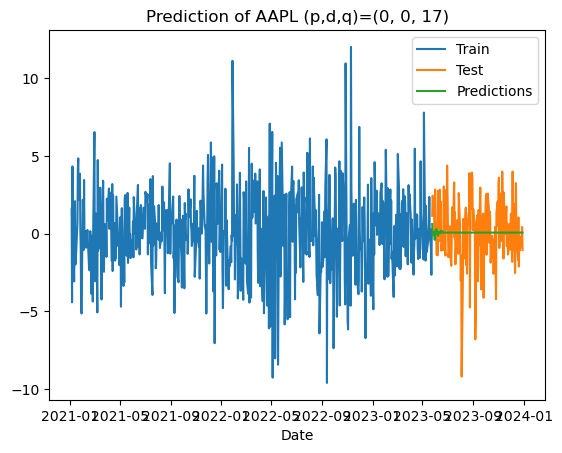

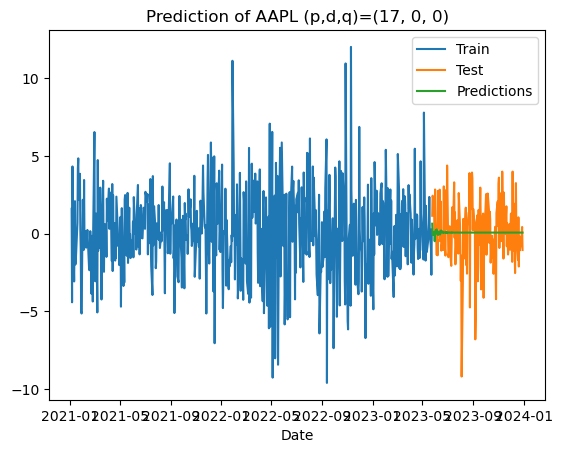

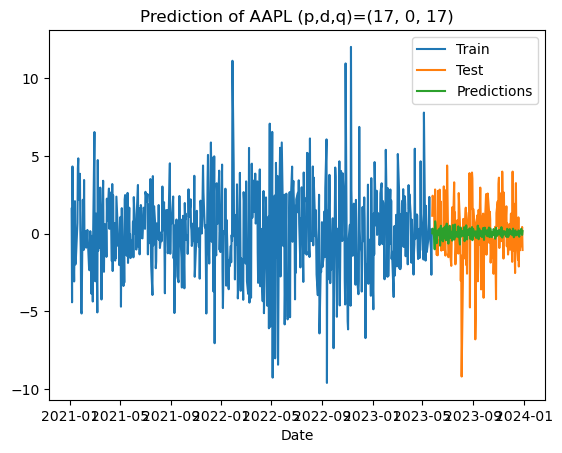

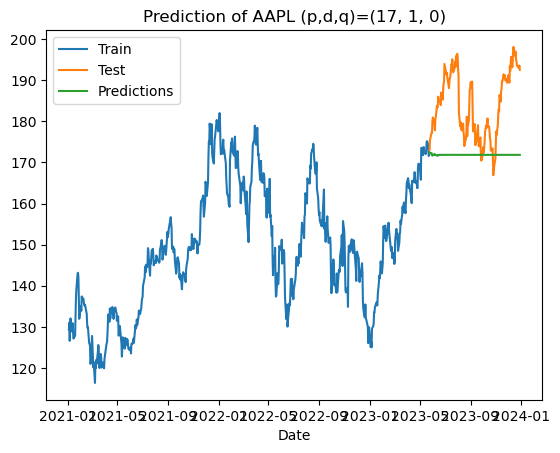

In [28]:
warnings.filterwarnings('ignore')
AAPL_metrics_MA = train_and_predict(first_diff_data, 'AAPL', p=0, d=0, q=17)
AAPL_metrics_AR = train_and_predict(first_diff_data, 'AAPL', p=17, d=0, q=0)
AAPL_metrics_ARMA = train_and_predict(first_diff_data, 'AAPL', p=17, d=0, q=17)
AAPL_metrics_ARIMA = train_and_predict(stock_data_filtered, 'AAPL', p=17, d=1, q=0)

In [29]:
all_metrics_AAPL = pd.concat([AAPL_metrics_MA, AAPL_metrics_AR, AAPL_metrics_ARMA,AAPL_metrics_ARIMA], ignore_index=True)

all_metrics_AAPL.head(5)

Stock                   Model       MAE       MSE      RMSE
0  AAPL   ARIMA(p=0, d=0, q=17)  1.621173  4.468604  2.113907
1  AAPL   ARIMA(p=17, d=0, q=0)  1.620506  4.460049  2.111883
2  AAPL  ARIMA(p=17, d=0, q=17)  1.641335  4.604327  2.145769
3  AAPL   ARIMA(p=17, d=1, q=0)  1.636445  4.502520  2.121914

As per the above we could see that Auto Regressive model with 17 lags and first difference marginally performs better than others. So lets forecast with ARIMA(17,1,0)

#### Best Forecast for Apple(AAPL)

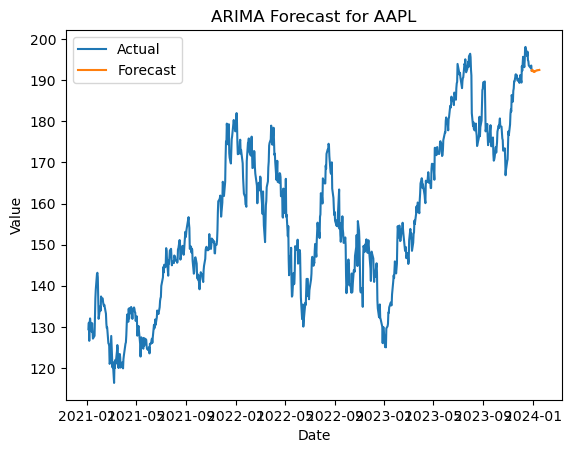

                  AAPL
2023-12-29  192.332027
2023-12-30  192.529985
2023-12-31  192.231381
2024-01-01  192.443099
2024-01-02  192.184361
2024-01-03  192.030638
2024-01-04  192.014519
2024-01-05  192.065148
2024-01-06  192.229258
2024-01-07  192.175145
2024-01-08  192.296923
2024-01-09  192.323205
2024-01-10  192.406990
2024-01-11  192.400404
2024-01-12  192.451680
2024-01-13  192.412603
2024-01-14  192.464318
2024-01-15  192.500589
2024-01-16  192.466940
2024-01-17  192.505857


In [30]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'AAPL', p=17, d=1, q=0)

### JNJ

#### Prediction of Johnson & Johnson (JNJ) 

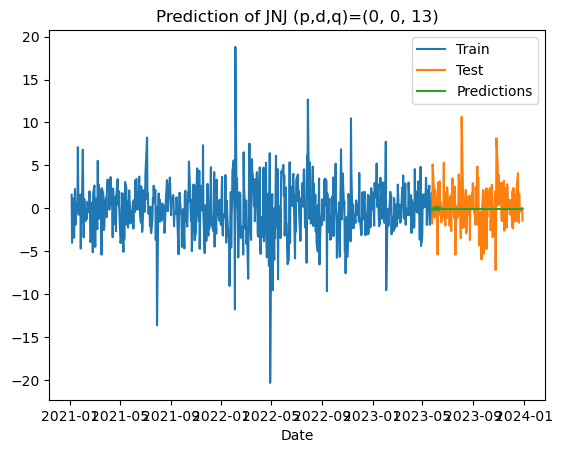

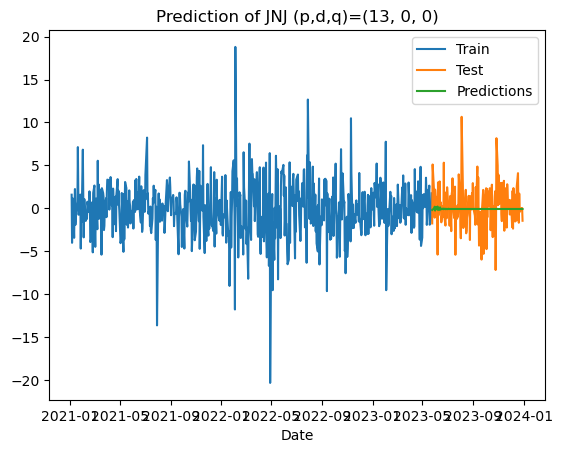

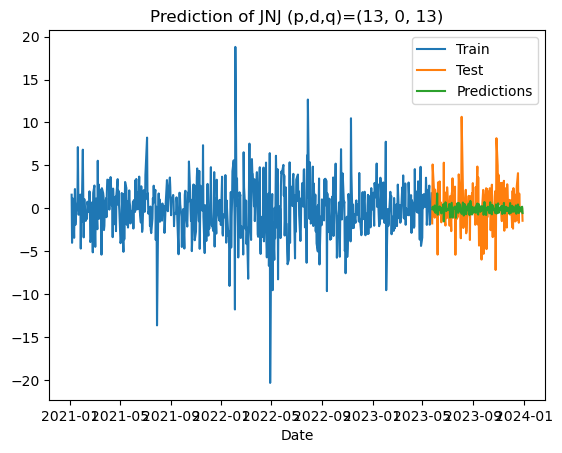

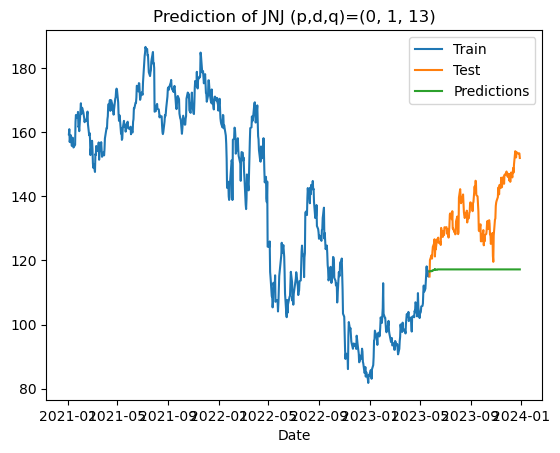

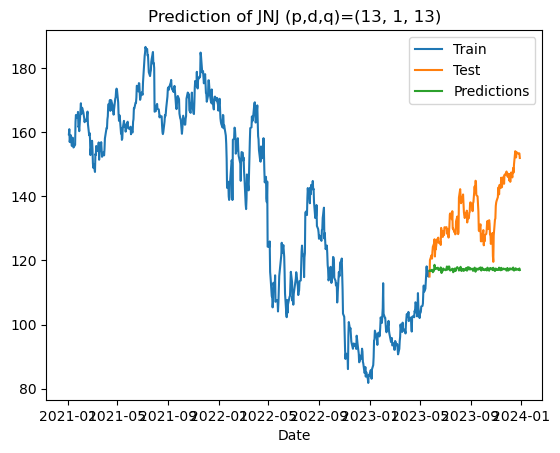

In [31]:
warnings.filterwarnings('ignore')
JNJ_metrics_MA = train_and_predict(first_diff_data, 'JNJ', p=0, d=0, q=13)
JNJ_metrics_AR = train_and_predict(first_diff_data, 'JNJ', p=13, d=0, q=0)
JNJ_metrics_ARMA = train_and_predict(first_diff_data, 'JNJ', p=13, d=0, q=13)
JNJ_metrics_ARIMA = train_and_predict(stock_data_filtered, 'JNJ', p=0, d=1, q=13)
JNJ_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'JNJ', p=13, d=1, q=13)


In [32]:
all_metrics_JNJ = pd.concat([JNJ_metrics_MA, JNJ_metrics_AR, JNJ_metrics_ARMA, JNJ_metrics_ARIMA, JNJ_metrics_ARIMA2], ignore_index=True)

all_metrics_JNJ.head(5)

Stock                   Model       MAE       MSE      RMSE
0   JNJ   ARIMA(p=0, d=0, q=13)  1.879014  6.378044  2.525479
1   JNJ   ARIMA(p=13, d=0, q=0)  1.879334  6.383364  2.526532
2   JNJ  ARIMA(p=13, d=0, q=13)  1.921464  6.692770  2.587039
3   JNJ   ARIMA(p=0, d=1, q=13)  1.874676  6.366131  2.523119
4   JNJ  ARIMA(p=13, d=1, q=13)  1.921290  6.694928  2.587456

For Johnson and Johnson, Moving average model with 13 lags and first difference is performing better. So let's forecast the JNJ stock price.

#### Best Forecast for Johnson & Johnson (JNJ)

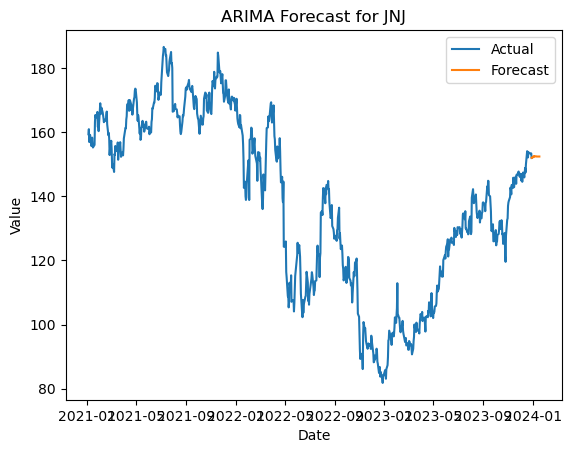

                   JNJ
2023-12-29  152.036173
2023-12-30  152.149468
2023-12-31  152.071782
2024-01-01  152.131397
2024-01-02  152.415477
2024-01-03  152.447733
2024-01-04  152.314417
2024-01-05  152.492642
2024-01-06  152.458010
2024-01-07  152.483464
2024-01-08  152.459503
2024-01-09  152.473778
2024-01-10  152.402203
2024-01-11  152.402203
2024-01-12  152.402203
2024-01-13  152.402203
2024-01-14  152.402203
2024-01-15  152.402203
2024-01-16  152.402203
2024-01-17  152.402203


In [33]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'JNJ', p=0, d=1, q=13)

### KO

#### Prediction of The Coca-Cola Company (KO) 

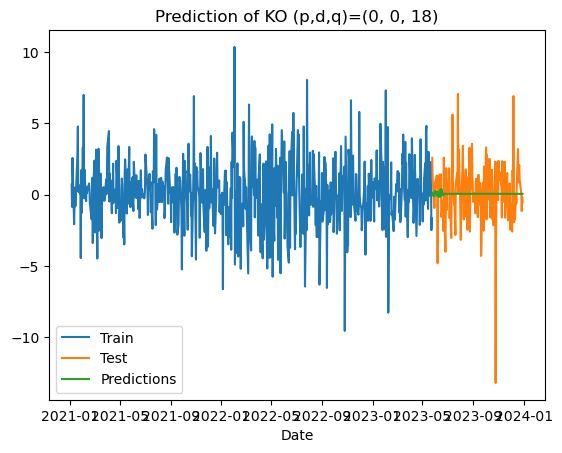

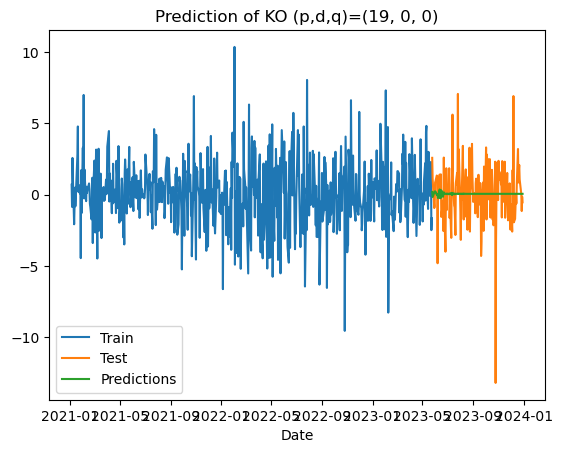

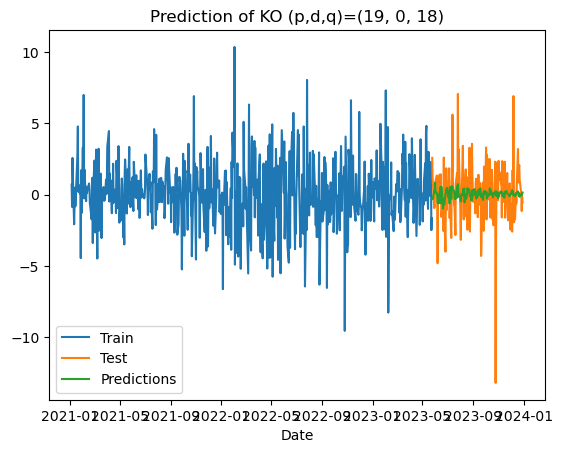

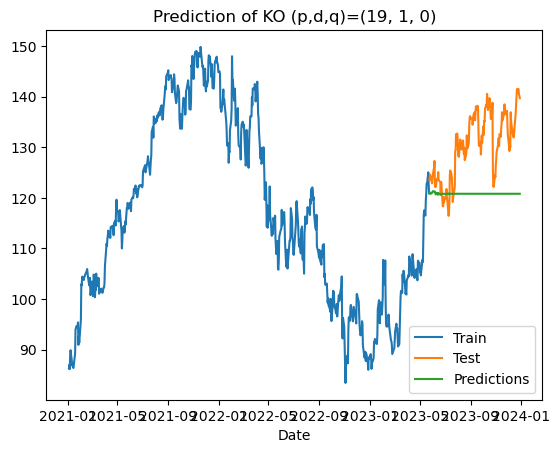

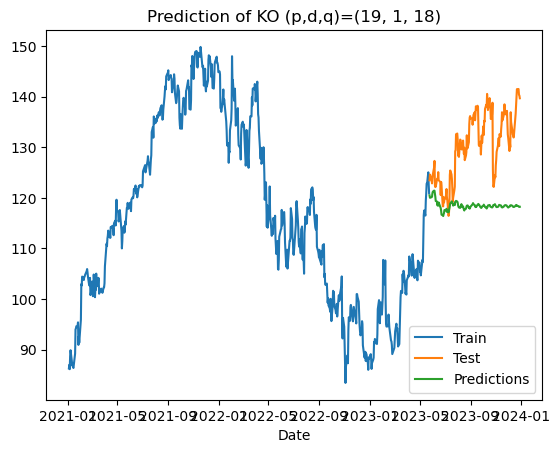

In [34]:
warnings.filterwarnings('ignore')
KO_metrics_MA = train_and_predict(first_diff_data, 'KO', p=0, d=0, q=18)
KO_metrics_AR = train_and_predict(first_diff_data, 'KO', p=19, d=0, q=0)
KO_metrics_ARMA = train_and_predict(first_diff_data, 'KO', p=19, d=0, q=18)
KO_metrics_ARIMA = train_and_predict(stock_data_filtered, 'KO', p=19, d=1, q=0)
KO_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'KO', p=19, d=1, q=18)

In [35]:
all_metrics_KO = pd.concat([KO_metrics_MA, KO_metrics_AR, KO_metrics_ARMA, KO_metrics_ARIMA, KO_metrics_ARIMA2], ignore_index=True)

all_metrics_KO.head(5)


Stock                   Model       MAE       MSE      RMSE
0    KO   ARIMA(p=0, d=0, q=18)  1.550756  4.809420  2.193039
1    KO   ARIMA(p=19, d=0, q=0)  1.547103  4.797685  2.190362
2    KO  ARIMA(p=19, d=0, q=18)  1.530556  4.693501  2.166449
3    KO   ARIMA(p=19, d=1, q=0)  1.546069  4.801138  2.191150
4    KO  ARIMA(p=19, d=1, q=18)  1.531177  4.680696  2.163492

Now for 'KO', ARIMA model with order (19,1,18) is performing better. The below is the forecast of that model

#### Forecast for The Coca-Cola Company (KO)

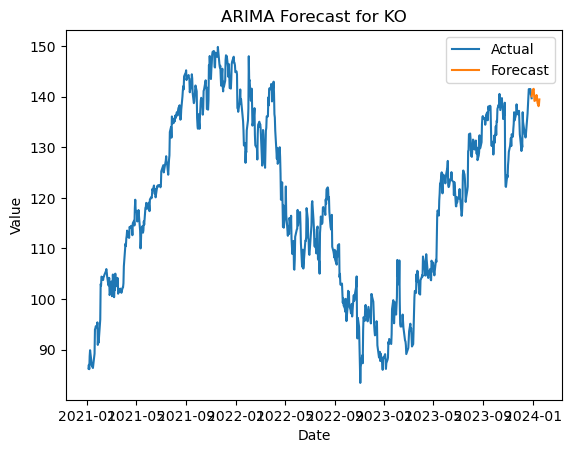

                    KO
2023-12-29  140.065173
2023-12-30  140.492616
2023-12-31  141.316894
2024-01-01  141.384381
2024-01-02  141.358541
2024-01-03  141.561453
2024-01-04  140.410107
2024-01-05  139.166138
2024-01-06  139.199707
2024-01-07  139.356632
2024-01-08  139.390336
2024-01-09  139.969004
2024-01-10  140.331303
2024-01-11  140.062938
2024-01-12  139.059289
2024-01-13  138.588386
2024-01-14  138.601823
2024-01-15  138.123986
2024-01-16  138.454084
2024-01-17  139.462519


In [36]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'KO', p=19, d=1, q=18)

### XOM

#### Prediction of Exxon Mobil Corporation (XOM) 

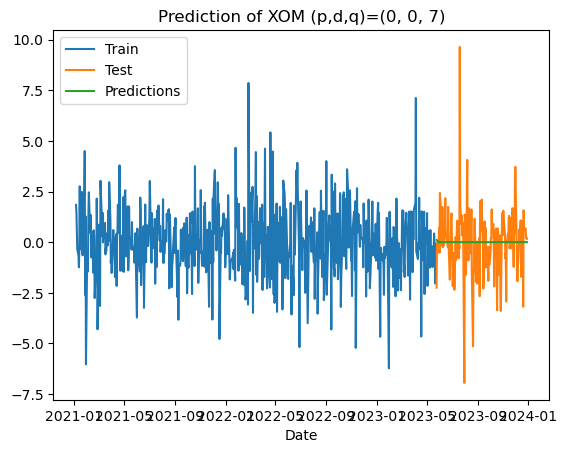

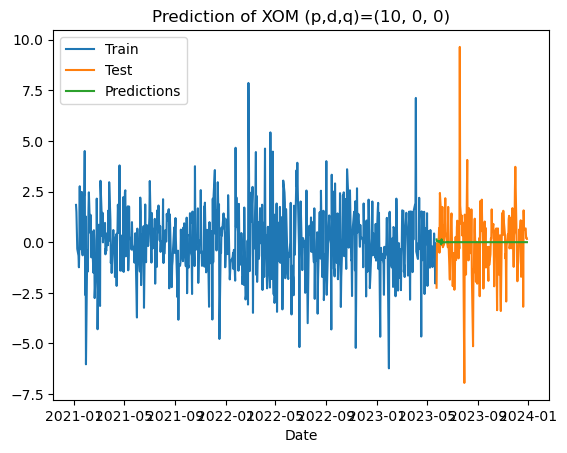

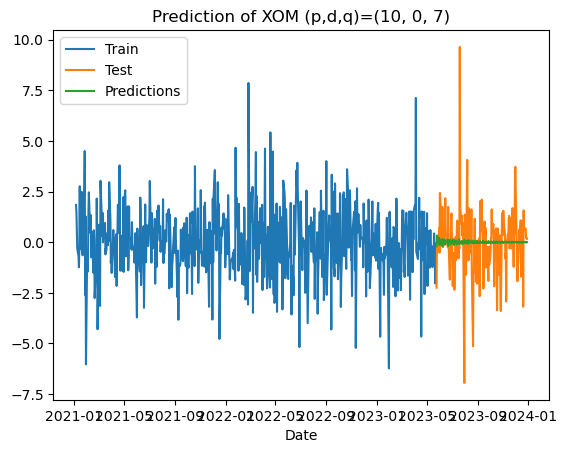

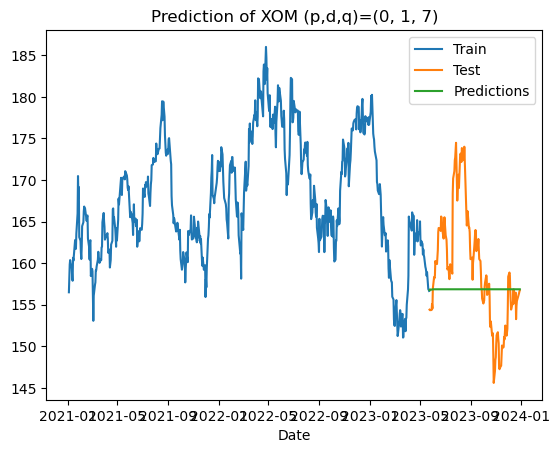

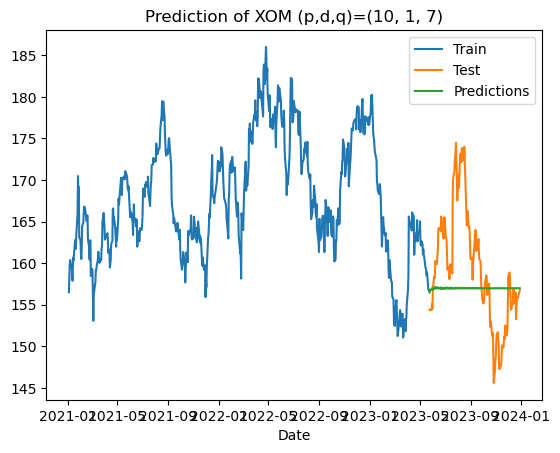

In [37]:
warnings.filterwarnings('ignore')
XOM_metrics_MA = train_and_predict(first_diff_data, 'XOM', p=0, d=0, q=7)
XOM_metrics_AR = train_and_predict(first_diff_data, 'XOM', p=10, d=0, q=0)
XOM_metrics_ARMA = train_and_predict(first_diff_data, 'XOM', p=10, d=0, q=7)
XOM_metrics_ARIMA = train_and_predict(stock_data_filtered, 'XOM', p=0, d=1, q=7)
XOM_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'XOM', p=10, d=1, q=7)

In [38]:
all_metrics_XOM = pd.concat([XOM_metrics_MA, XOM_metrics_AR, XOM_metrics_ARMA, XOM_metrics_ARIMA, XOM_metrics_ARIMA2], ignore_index=True)

all_metrics_XOM.head(5)

Stock                  Model       MAE       MSE      RMSE
0   XOM   ARIMA(p=0, d=0, q=7)  1.136392  2.799577  1.673194
1   XOM  ARIMA(p=10, d=0, q=0)  1.137578  2.801320  1.673714
2   XOM  ARIMA(p=10, d=0, q=7)  1.139893  2.804688  1.674720
3   XOM   ARIMA(p=0, d=1, q=7)  1.128284  2.781309  1.667726
4   XOM  ARIMA(p=10, d=1, q=7)  1.133661  2.795995  1.672123

Here Moving average model with first difference is having minimum errors, so lets forecast with this model.

#### Best Forecast for Exxon Mobil Corporation (XOM) 

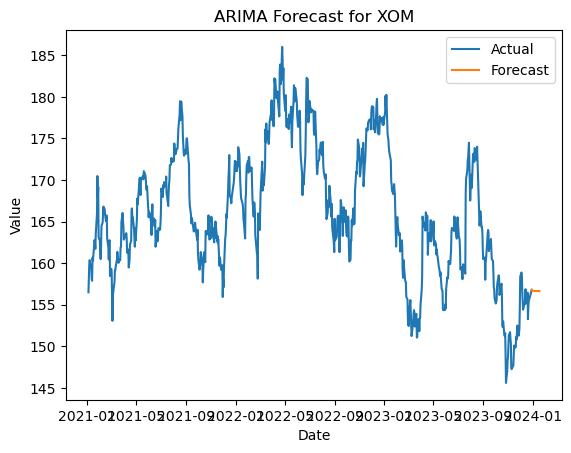

                   XOM
2023-12-29  156.831851
2023-12-30  156.758564
2023-12-31  156.708308
2024-01-01  156.681442
2024-01-02  156.673184
2024-01-03  156.660006
2024-01-04  156.651992
2024-01-05  156.651992
2024-01-06  156.651992
2024-01-07  156.651992
2024-01-08  156.651992
2024-01-09  156.651992
2024-01-10  156.651992
2024-01-11  156.651992
2024-01-12  156.651992
2024-01-13  156.651992
2024-01-14  156.651992
2024-01-15  156.651992
2024-01-16  156.651992
2024-01-17  156.651992


In [39]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'XOM', p=0, d=1, q=7)

### Amazon

#### Prediction of AMZN(AMAZON)

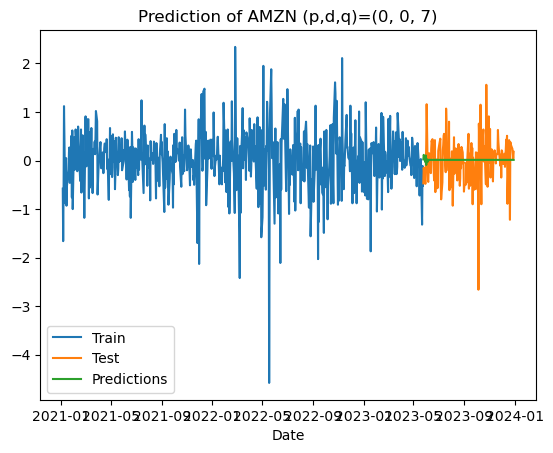

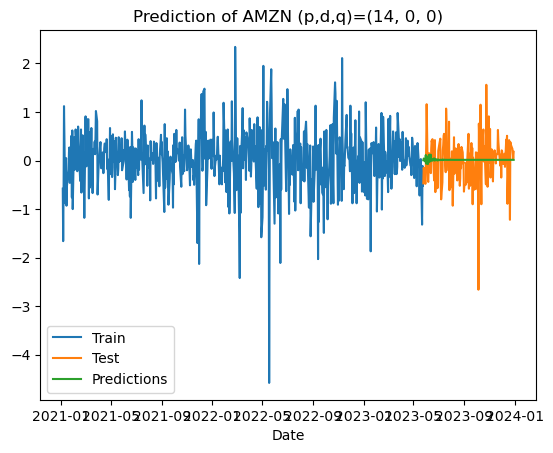

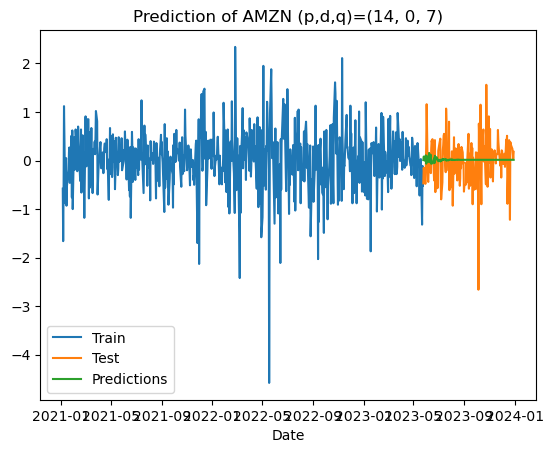

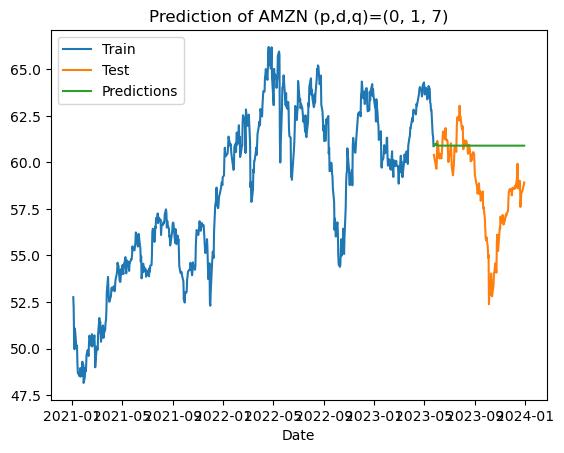

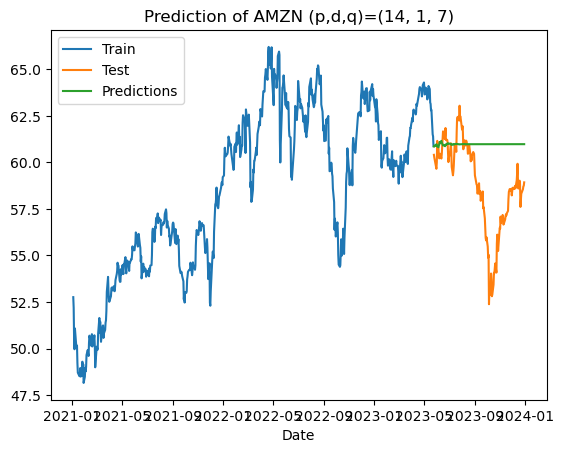

In [40]:
warnings.filterwarnings('ignore')
AMZN_metrics_MA = train_and_predict(first_diff_data, 'AMZN', p=0, d=0, q=7)
AMZN_metrics_AR = train_and_predict(first_diff_data, 'AMZN', p=14, d=0, q=0)
AMZN_metrics_ARMA = train_and_predict(first_diff_data, 'AMZN', p=14, d=0, q=7)
AMZN_metrics_ARIMA = train_and_predict(stock_data_filtered, 'AMZN', p=0, d=1, q=7)
AMZN_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'AMZN', p=14, d=1, q=7)


In [41]:
all_metrics_AMZN = pd.concat([AMZN_metrics_MA, AMZN_metrics_AR, AMZN_metrics_ARMA, AMZN_metrics_ARIMA, AMZN_metrics_ARIMA2], ignore_index=True)

all_metrics_AMZN.head(5)


Stock                  Model       MAE       MSE      RMSE
0  AMZN   ARIMA(p=0, d=0, q=7)  0.370185  0.247547  0.497541
1  AMZN  ARIMA(p=14, d=0, q=0)  0.370434  0.248447  0.498444
2  AMZN  ARIMA(p=14, d=0, q=7)  0.373443  0.250191  0.500191
3  AMZN   ARIMA(p=0, d=1, q=7)  0.370189  0.247090  0.497081
4  AMZN  ARIMA(p=14, d=1, q=7)  0.373371  0.249998  0.499998

Moving average model with 7 lags and first difference is marginally performing better than other models. Lets use the same for forecasting.

#### Best Forecast for AMZN(Amazon)

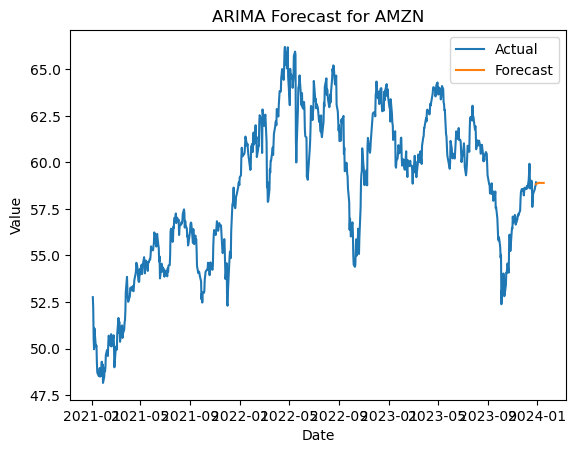

                 AMZN
2023-12-29  58.833397
2023-12-30  58.850721
2023-12-31  58.861956
2024-01-01  58.871270
2024-01-02  58.888742
2024-01-03  58.891190
2024-01-04  58.901329
2024-01-05  58.901329
2024-01-06  58.901329
2024-01-07  58.901329
2024-01-08  58.901329
2024-01-09  58.901329
2024-01-10  58.901329
2024-01-11  58.901329
2024-01-12  58.901329
2024-01-13  58.901329
2024-01-14  58.901329
2024-01-15  58.901329
2024-01-16  58.901329
2024-01-17  58.901329


In [42]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'AMZN', p=0, d=1, q=7)

### V-Visa

#### Prediction of V (Visa)

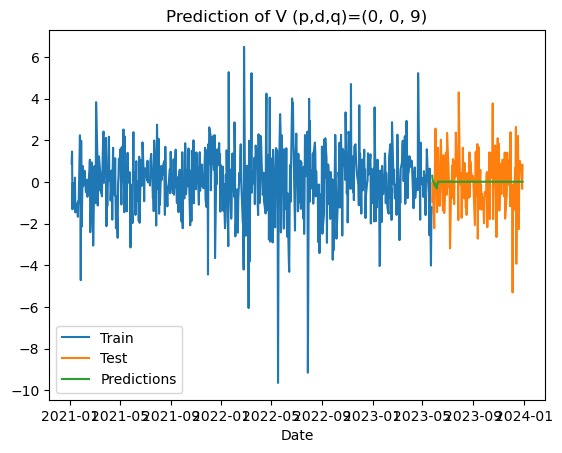

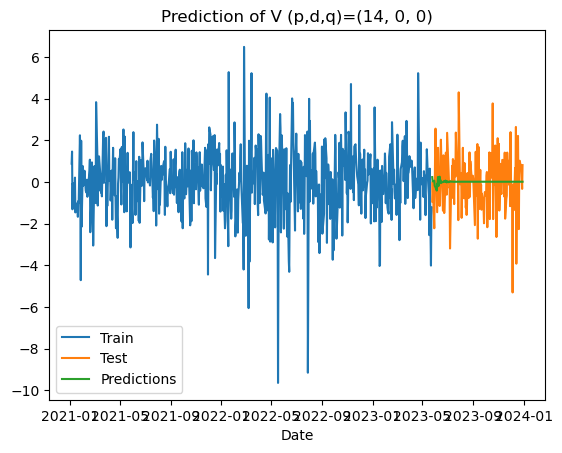

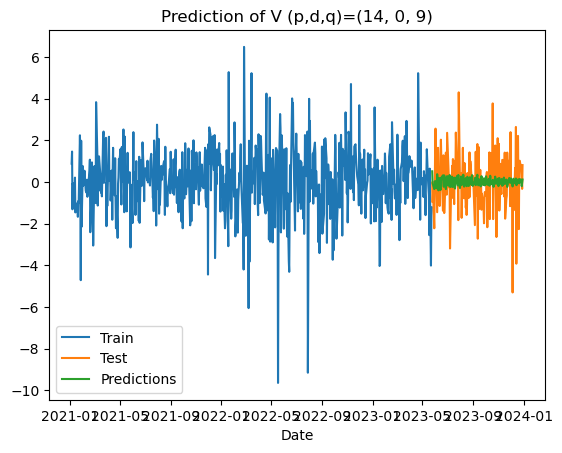

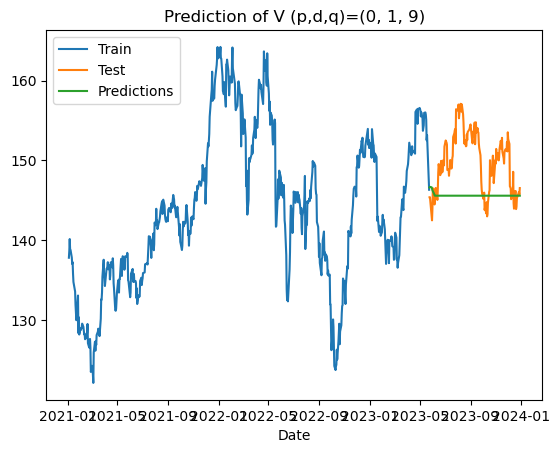

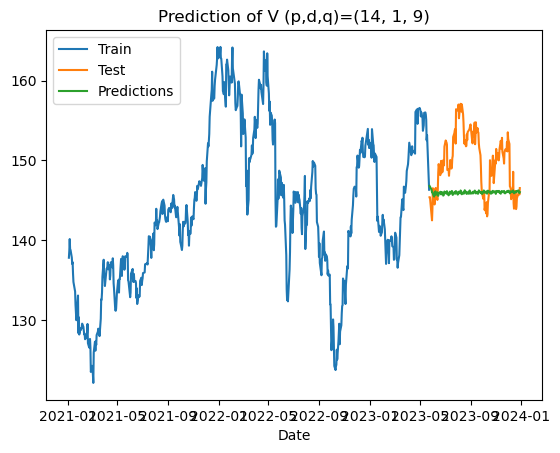

In [43]:
warnings.filterwarnings('ignore')
V_metrics_MA = train_and_predict(first_diff_data, 'V', p=0, d=0, q=9)
V_metrics_AR = train_and_predict(first_diff_data, 'V', p=14, d=0, q=0)
V_metrics_ARMA = train_and_predict(first_diff_data, 'V', p=14, d=0, q=9)
V_metrics_ARIMA = train_and_predict(stock_data_filtered, 'V', p=0, d=1, q=9)
V_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'V', p=14, d=1, q=9)

In [44]:
all_metrics_V = pd.concat([V_metrics_MA, V_metrics_AR, V_metrics_ARMA, V_metrics_ARIMA, V_metrics_ARIMA2], ignore_index=True)

all_metrics_V.head(5)


Stock                  Model       MAE       MSE      RMSE
0     V   ARIMA(p=0, d=0, q=9)  1.026176  1.857854  1.363031
1     V  ARIMA(p=14, d=0, q=0)  1.027804  1.866226  1.366099
2     V  ARIMA(p=14, d=0, q=9)  1.045793  1.870398  1.367625
3     V   ARIMA(p=0, d=1, q=9)  1.025249  1.860169  1.363880
4     V  ARIMA(p=14, d=1, q=9)  1.044730  1.868206  1.366823

Even for Visa, Moving averages with 9 lags and first difference is having minimal errors. Lets forecast with this model.

#### Forecast for V (VISA)

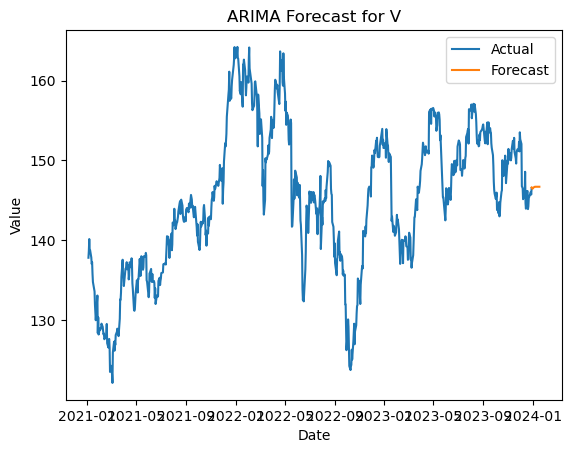

                     V
2023-12-29  146.613961
2023-12-30  146.558774
2023-12-31  146.441833
2024-01-01  146.520678
2024-01-02  146.602516
2024-01-03  146.627352
2024-01-04  146.649240
2024-01-05  146.669532
2024-01-06  146.706449
2024-01-07  146.706449
2024-01-08  146.706449
2024-01-09  146.706449
2024-01-10  146.706449
2024-01-11  146.706449
2024-01-12  146.706449
2024-01-13  146.706449
2024-01-14  146.706449
2024-01-15  146.706449
2024-01-16  146.706449
2024-01-17  146.706449


In [45]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'V', p=0, d=1, q=9)

### PG

#### Prediction of Procter & Gamble Company (PG)

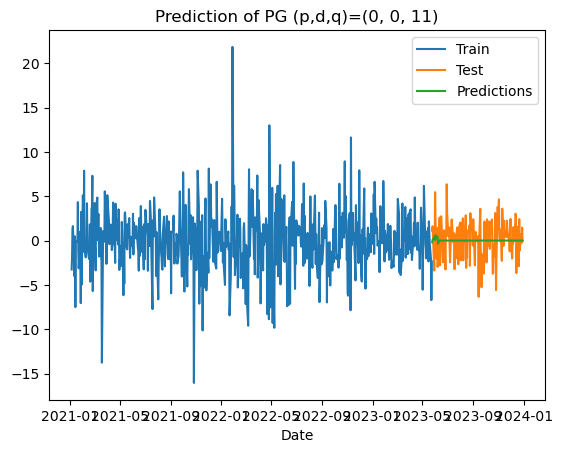

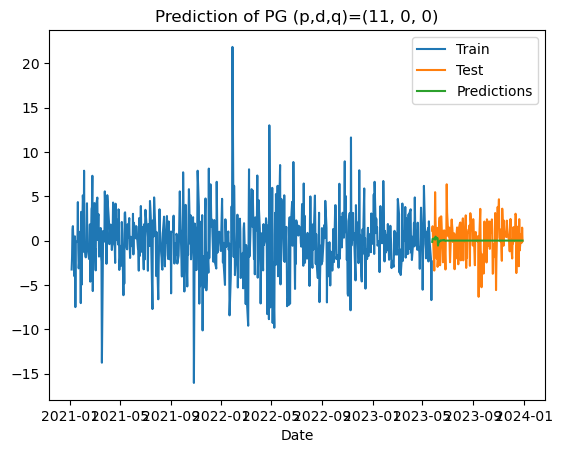

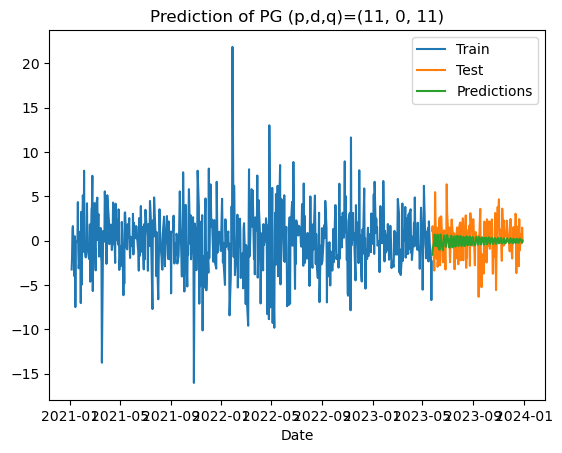

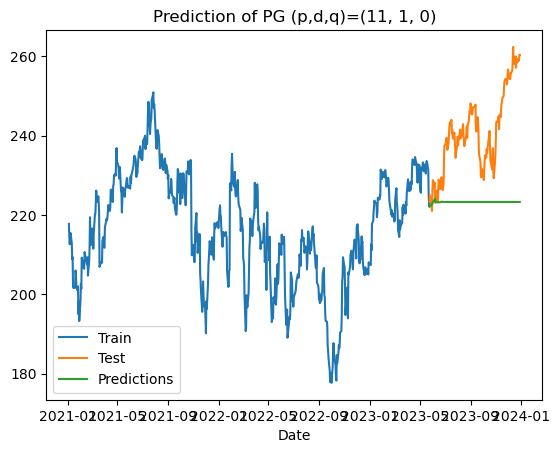

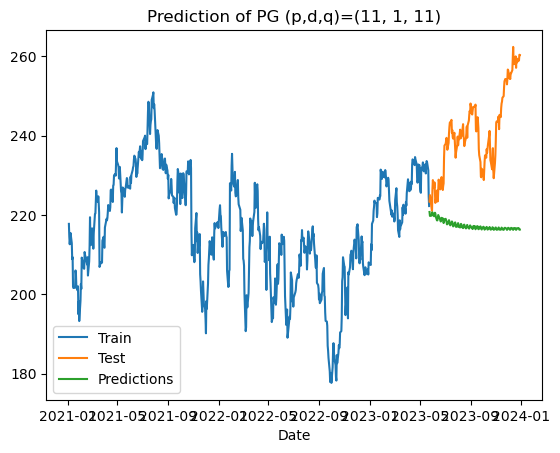

In [46]:
warnings.filterwarnings('ignore')
PG_metrics_MA = train_and_predict(first_diff_data, 'PG', p=0, d=0, q=11)
PG_metrics_AR = train_and_predict(first_diff_data, 'PG', p=11, d=0, q=0)
PG_metrics_ARMA = train_and_predict(first_diff_data, 'PG', p=11, d=0, q=11)
PG_metrics_ARIMA = train_and_predict(stock_data_filtered, 'PG', p=11, d=1, q=0)
PG_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'PG', p=11, d=1, q=11)


In [47]:
all_metrics_PG = pd.concat([PG_metrics_MA, PG_metrics_AR, PG_metrics_ARMA, PG_metrics_ARIMA, PG_metrics_ARIMA2], ignore_index=True)

all_metrics_PG.head(5)


Stock                   Model       MAE       MSE      RMSE
0    PG   ARIMA(p=0, d=0, q=11)  1.735324  4.659764  2.158649
1    PG   ARIMA(p=11, d=0, q=0)  1.732890  4.645792  2.155410
2    PG  ARIMA(p=11, d=0, q=11)  1.792991  4.826748  2.196986
3    PG   ARIMA(p=11, d=1, q=0)  1.737965  4.671358  2.161332
4    PG  ARIMA(p=11, d=1, q=11)  1.781395  4.797851  2.190400

#### Best Forecast for Procter & Gamble Company (PG)

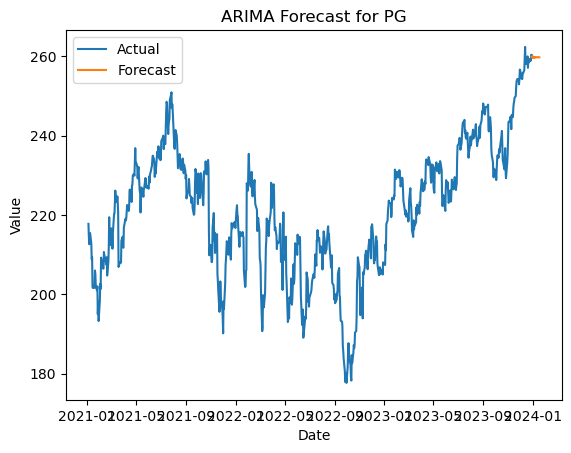

                    PG
2023-12-29  259.863989
2023-12-30  259.775656
2023-12-31  259.720033
2024-01-01  260.021634
2024-01-02  259.583663
2024-01-03  259.806801
2024-01-04  259.696875
2024-01-05  259.749960
2024-01-06  259.662148
2024-01-07  259.772742
2024-01-08  259.832612
2024-01-09  259.783025
2024-01-10  259.775830
2024-01-11  259.756900
2024-01-12  259.810626
2024-01-13  259.760268
2024-01-14  259.777810
2024-01-15  259.768955
2024-01-16  259.776441
2024-01-17  259.764175


In [48]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'PG', p=11, d=1, q=0)

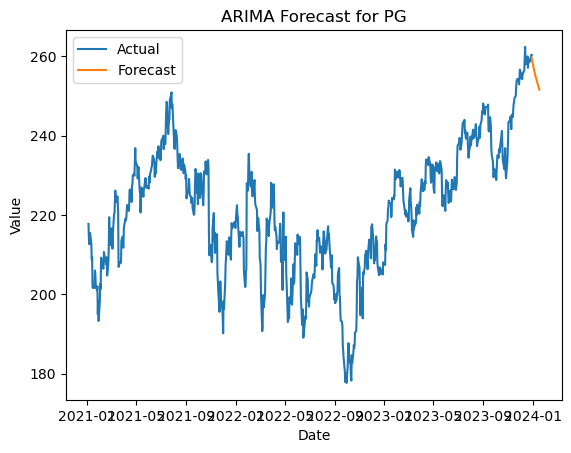

                    PG
2023-12-29  259.649625
2023-12-30  259.107223
2023-12-31  258.517455
2024-01-01  258.173346
2024-01-02  257.513579
2024-01-03  257.068087
2024-01-04  256.592875
2024-01-05  256.138134
2024-01-06  255.647327
2024-01-07  255.228423
2024-01-08  254.867874
2024-01-09  254.492418
2024-01-10  254.119567
2024-01-11  253.742157
2024-01-12  253.384882
2024-01-13  253.020414
2024-01-14  252.658505
2024-01-15  252.301722
2024-01-16  251.950023
2024-01-17  251.599476


In [49]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'PG', p=11, d=0, q=0)

### GOOGL

#### Prediction of Alphabet Inc. (GOOGL) 

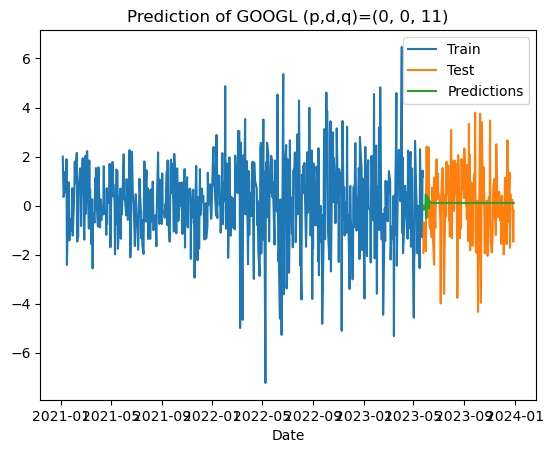

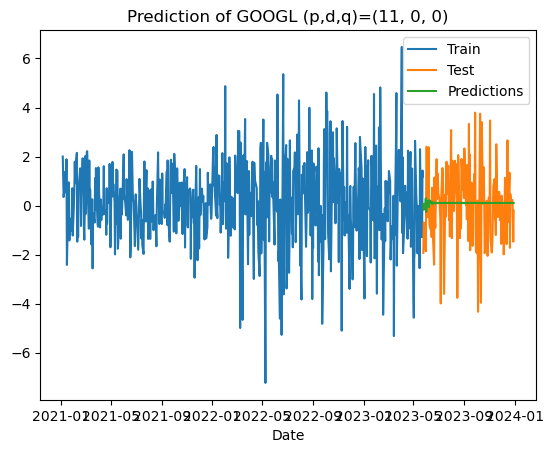

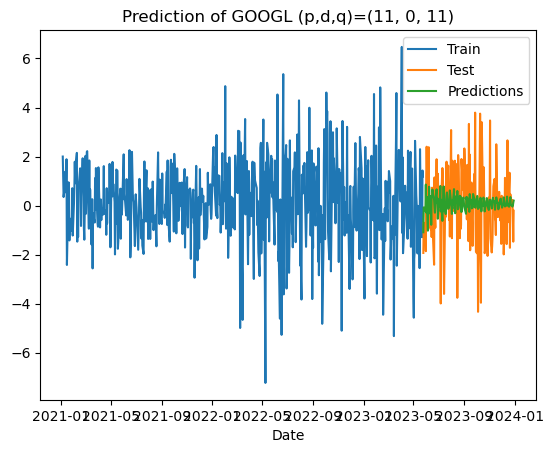

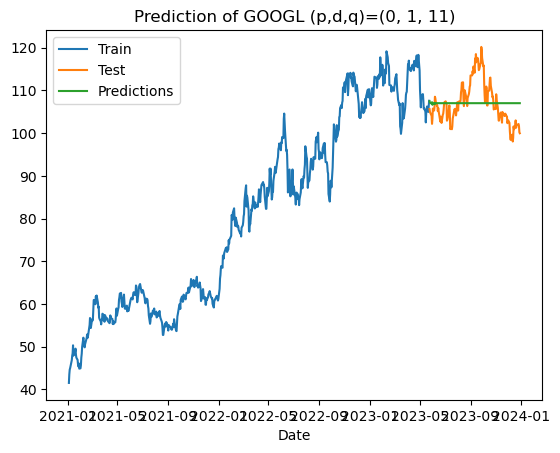

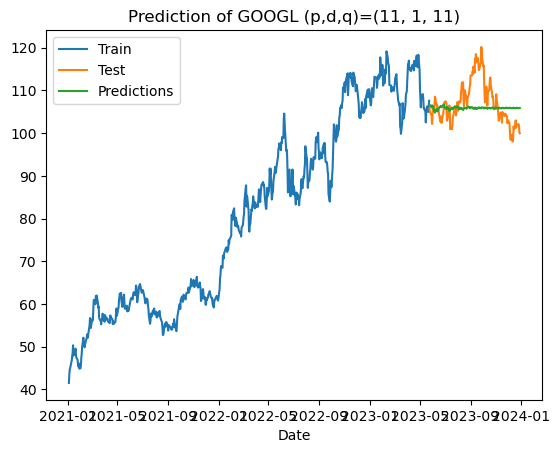

In [50]:
warnings.filterwarnings('ignore')
GOOGL_metrics_MA = train_and_predict(first_diff_data, 'GOOGL', p=0, d=0, q=11)
GOOGL_metrics_AR = train_and_predict(first_diff_data, 'GOOGL', p=11, d=0, q=0)
GOOGL_metrics_ARMA = train_and_predict(first_diff_data, 'GOOGL', p=11, d=0, q=11)
GOOGL_metrics_ARIMA = train_and_predict(stock_data_filtered, 'GOOGL', p=0, d=1, q=11)
GOOGL_metrics_ARIMA2 = train_and_predict(stock_data_filtered, 'GOOGL', p=11, d=1, q=11)

In [51]:
all_metrics_GOOGL = pd.concat([GOOGL_metrics_MA, GOOGL_metrics_AR, GOOGL_metrics_ARMA, GOOGL_metrics_ARIMA, GOOGL_metrics_ARIMA2], ignore_index=True)

all_metrics_GOOGL.head(5)


Stock                   Model       MAE       MSE      RMSE
0  GOOGL   ARIMA(p=0, d=0, q=11)  1.193366  2.375423  1.541241
1  GOOGL   ARIMA(p=11, d=0, q=0)  1.194370  2.375031  1.541114
2  GOOGL  ARIMA(p=11, d=0, q=11)  1.208892  2.421626  1.556158
3  GOOGL   ARIMA(p=0, d=1, q=11)  1.184528  2.346237  1.531743
4  GOOGL  ARIMA(p=11, d=1, q=11)  1.214484  2.393821  1.547198

As per the above, we can see that Moving average model with 11 lags and first difference is having least errors. Forcast of this model would be like below.

#### Best Forecast for Alphabet Inc. (GOOGL)

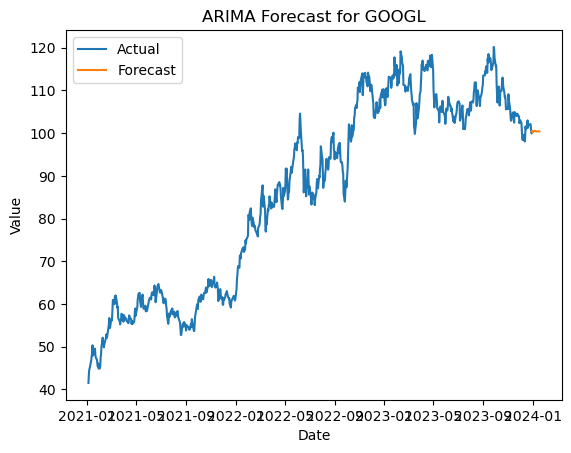

                 GOOGL
2023-12-29  100.387184
2023-12-30  100.325543
2023-12-31  100.217644
2024-01-01  100.490580
2024-01-02  100.355733
2024-01-03  100.430229
2024-01-04  100.501109
2024-01-05  100.490085
2024-01-06  100.555738
2024-01-07  100.423056
2024-01-08  100.416009
2024-01-09  100.416009
2024-01-10  100.416009
2024-01-11  100.416009
2024-01-12  100.416009
2024-01-13  100.416009
2024-01-14  100.416009
2024-01-15  100.416009
2024-01-16  100.416009
2024-01-17  100.416009


In [52]:
warnings.filterwarnings('ignore')
forecast_arima(stock_data_filtered, 'GOOGL', p=0, d=1, q=11)

#### Conclusion

 The project aimed to optimize portfolio performance and forecast stock movements across various sectors using machine learning and financial concepts.  
 It introduced machine learning fundamentals, introduced main financial concepts, demonstrated how to access financial data sources via APIs, and expanded on the Capital Asset Pricing Model (CAPM).   
The project  constructed portfolios that maximize returns for a given level of risk, emphasizing diversification. Time series analysis techniques were applied in Python  for financial analysis.   
Financial statement analysis methods were explored to evaluate a company's financial health, profitability, and growth potential.  
 The project aimed to stay updated with recent developments and trends in finance, providing actionable insights for optimizing investment portfolios and forecasting stock prices in diverse market environments.